In [1]:
%run supportvectors-common.ipynb
# Ensure that the backend is matplotlib
pd.options.plotting.backend = "matplotlib"



<center><img src="https://d4x5p7s4.rocketcdn.me/wp-content/uploads/2016/03/logo-poster-smaller.png"/> </center>
<div style="color:#aaa;font-size:8pt">
<hr/>
&copy; SupportVectors. All rights reserved. <blockquote>This notebook is the intellectual property of SupportVectors, and part of its training material. 
Only the participants in SupportVectors workshops are allowed to study the notebooks for educational purposes currently, but is prohibited from copying or using it for any other purposes without written permission.

<b> These notebooks are chapters and sections from Asif Qamar's textbook that he is writing on Data Science. So we request you to not circulate the material to others.</b>
 </blockquote>
 <hr/>
</div>



# Revisiting the bar, with Seaborn

We are going to revising the top of bar plots. However, instead of using the `matplotlib` library directly, we will use `seaborn` which adds some pleasing and powerful functionality on top of `matplotlib`.

## Load and summarize

In [2]:
url = "https://raw.githubusercontent.com/supportvectors/viz-datasets/main/" \
    + "regional_covid_data.csv"
data = pd.read_csv(url)
data

,Region,Confirmed,Deaths,Recovered,Active
0,Africa,723207,12223,440645,270339
1,Americas,8839286,342732,4468616,4027938
2,Eastern Mediterranean,1490744,38339,1201400,251005
3,Europe,3299523,211144,1993723,1094656
4,South-East Asia,1835297,41349,1156933,637015
5,Western Pacific,292428,8249,206770,77409


## The Bar chart family

Let us now start learning about bar-charts, starting with the very basic one.

<AxesSubplot: xlabel='Region', ylabel='Confirmed'>

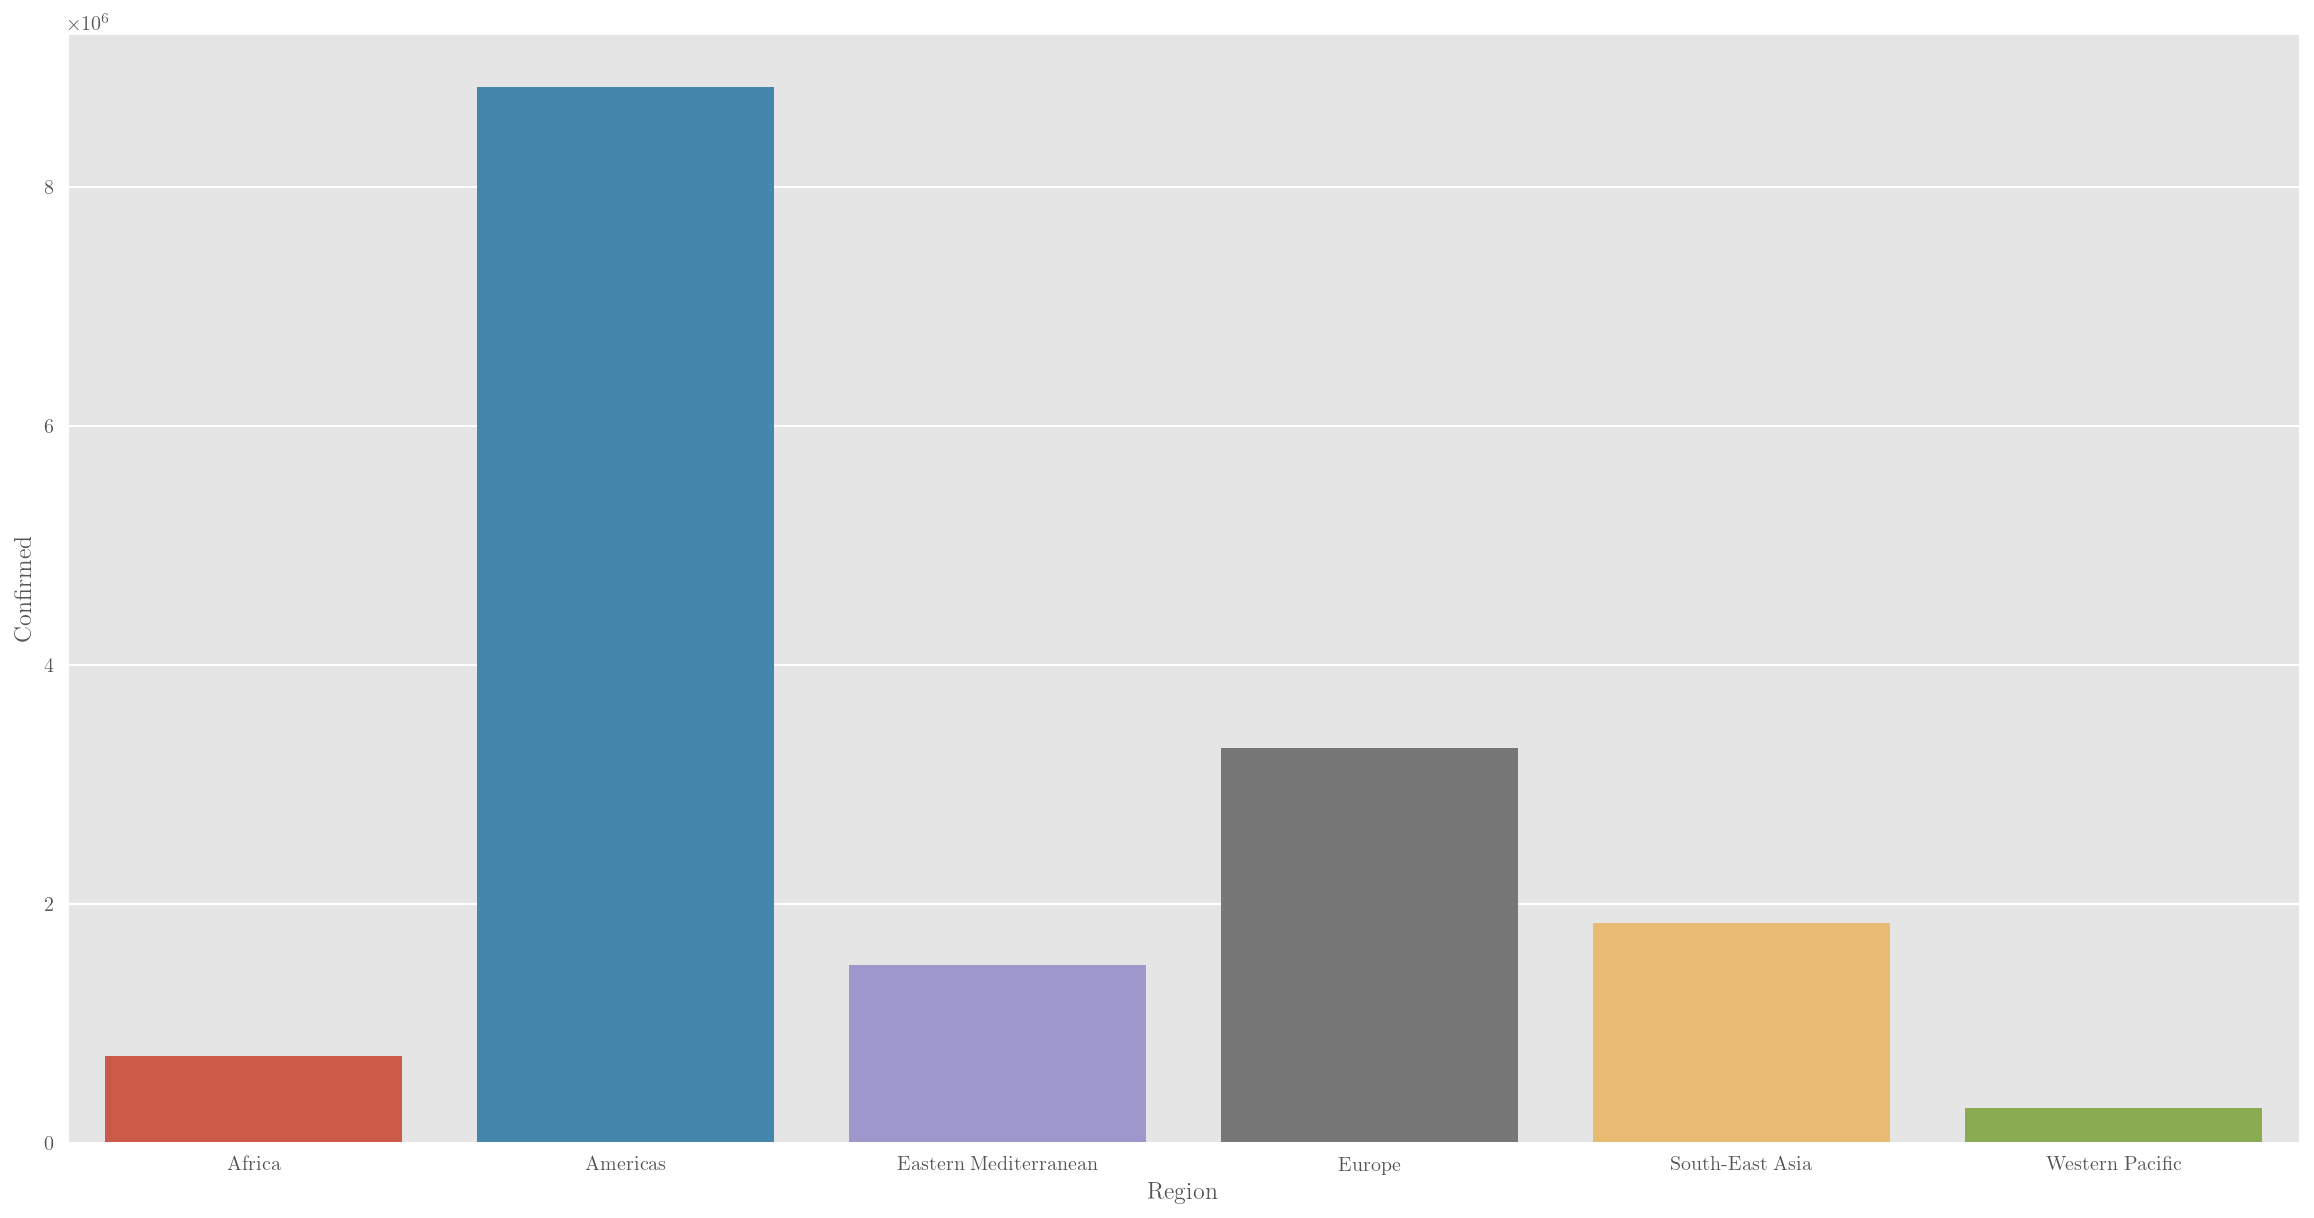

In [3]:

sns.barplot(x='Region', y='Confirmed', data=data)


### Observations

This is a straightforward rendering of the bar chart, where we see the number of confirmed cases by region. Note how the x-tick labels are overlapping.

In a manner analogous to the `visualization-1.ipynb`, we will systematically improve the plot step by step.

### Tight Layout

Once again, while this is not a necessity, as a practice that will help when we do more complex graphs, we will start by first appending a layout statement.

Notice, once again, how it removes the messages at the top of the plot.

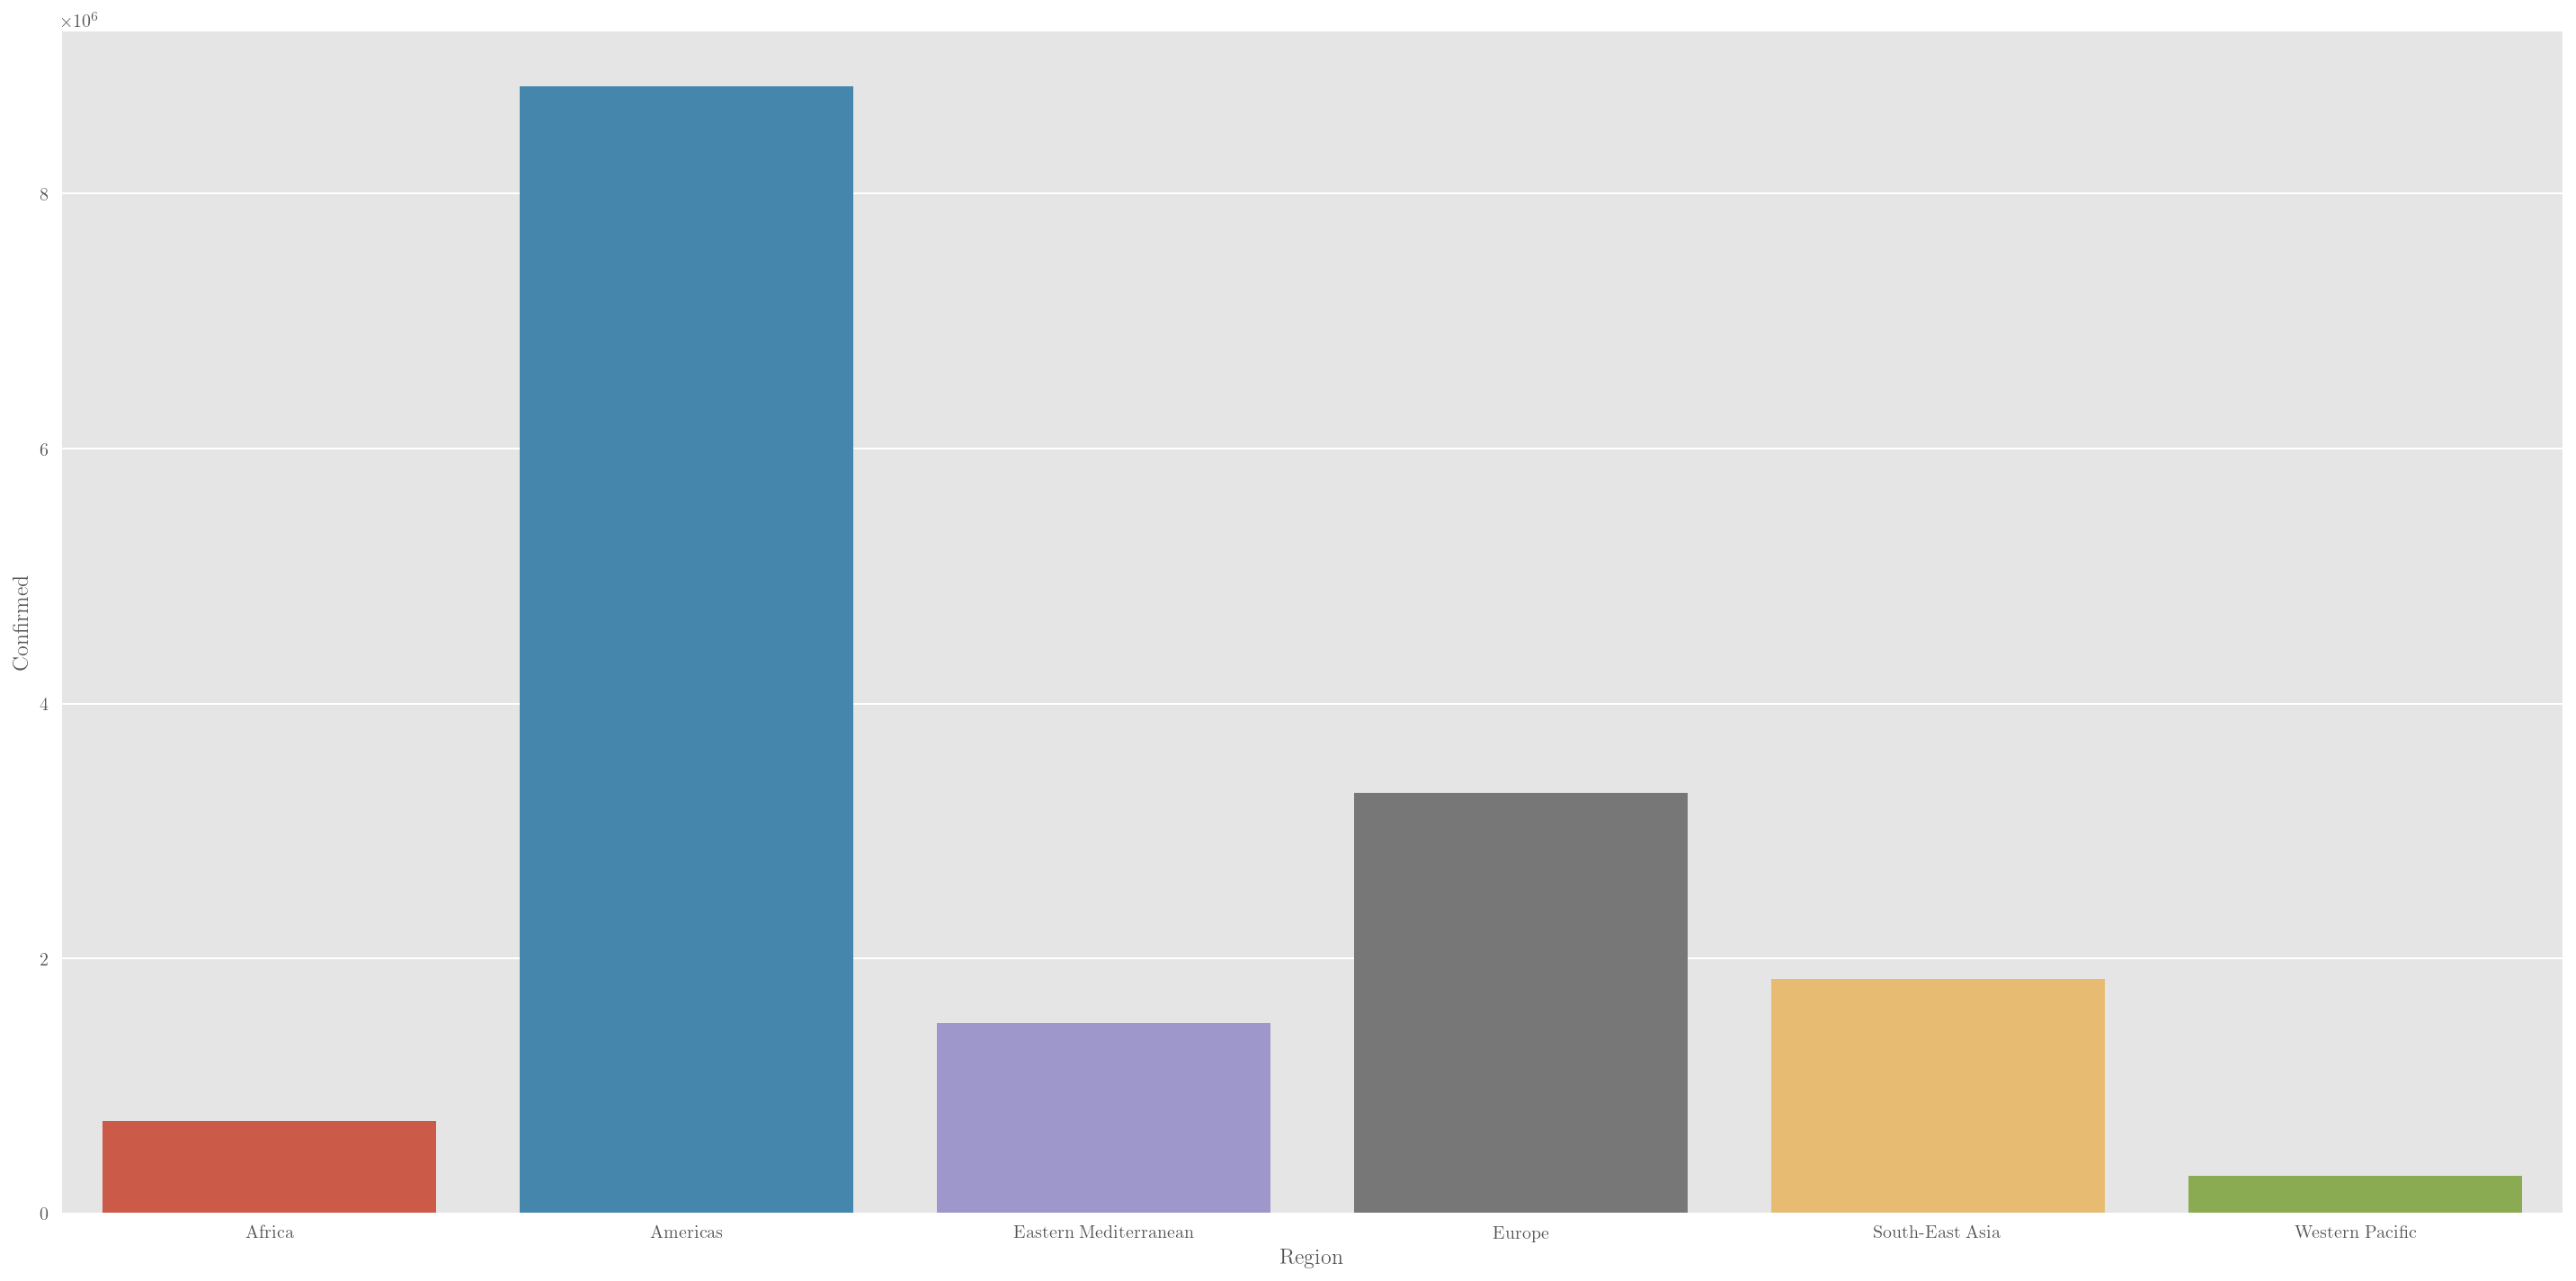

In [4]:
sns.barplot(x='Region', y='Confirmed', data=data)

plt.tight_layout()

### Rotate the x-axis ticks.

Let us now rotate the x-tick labels.

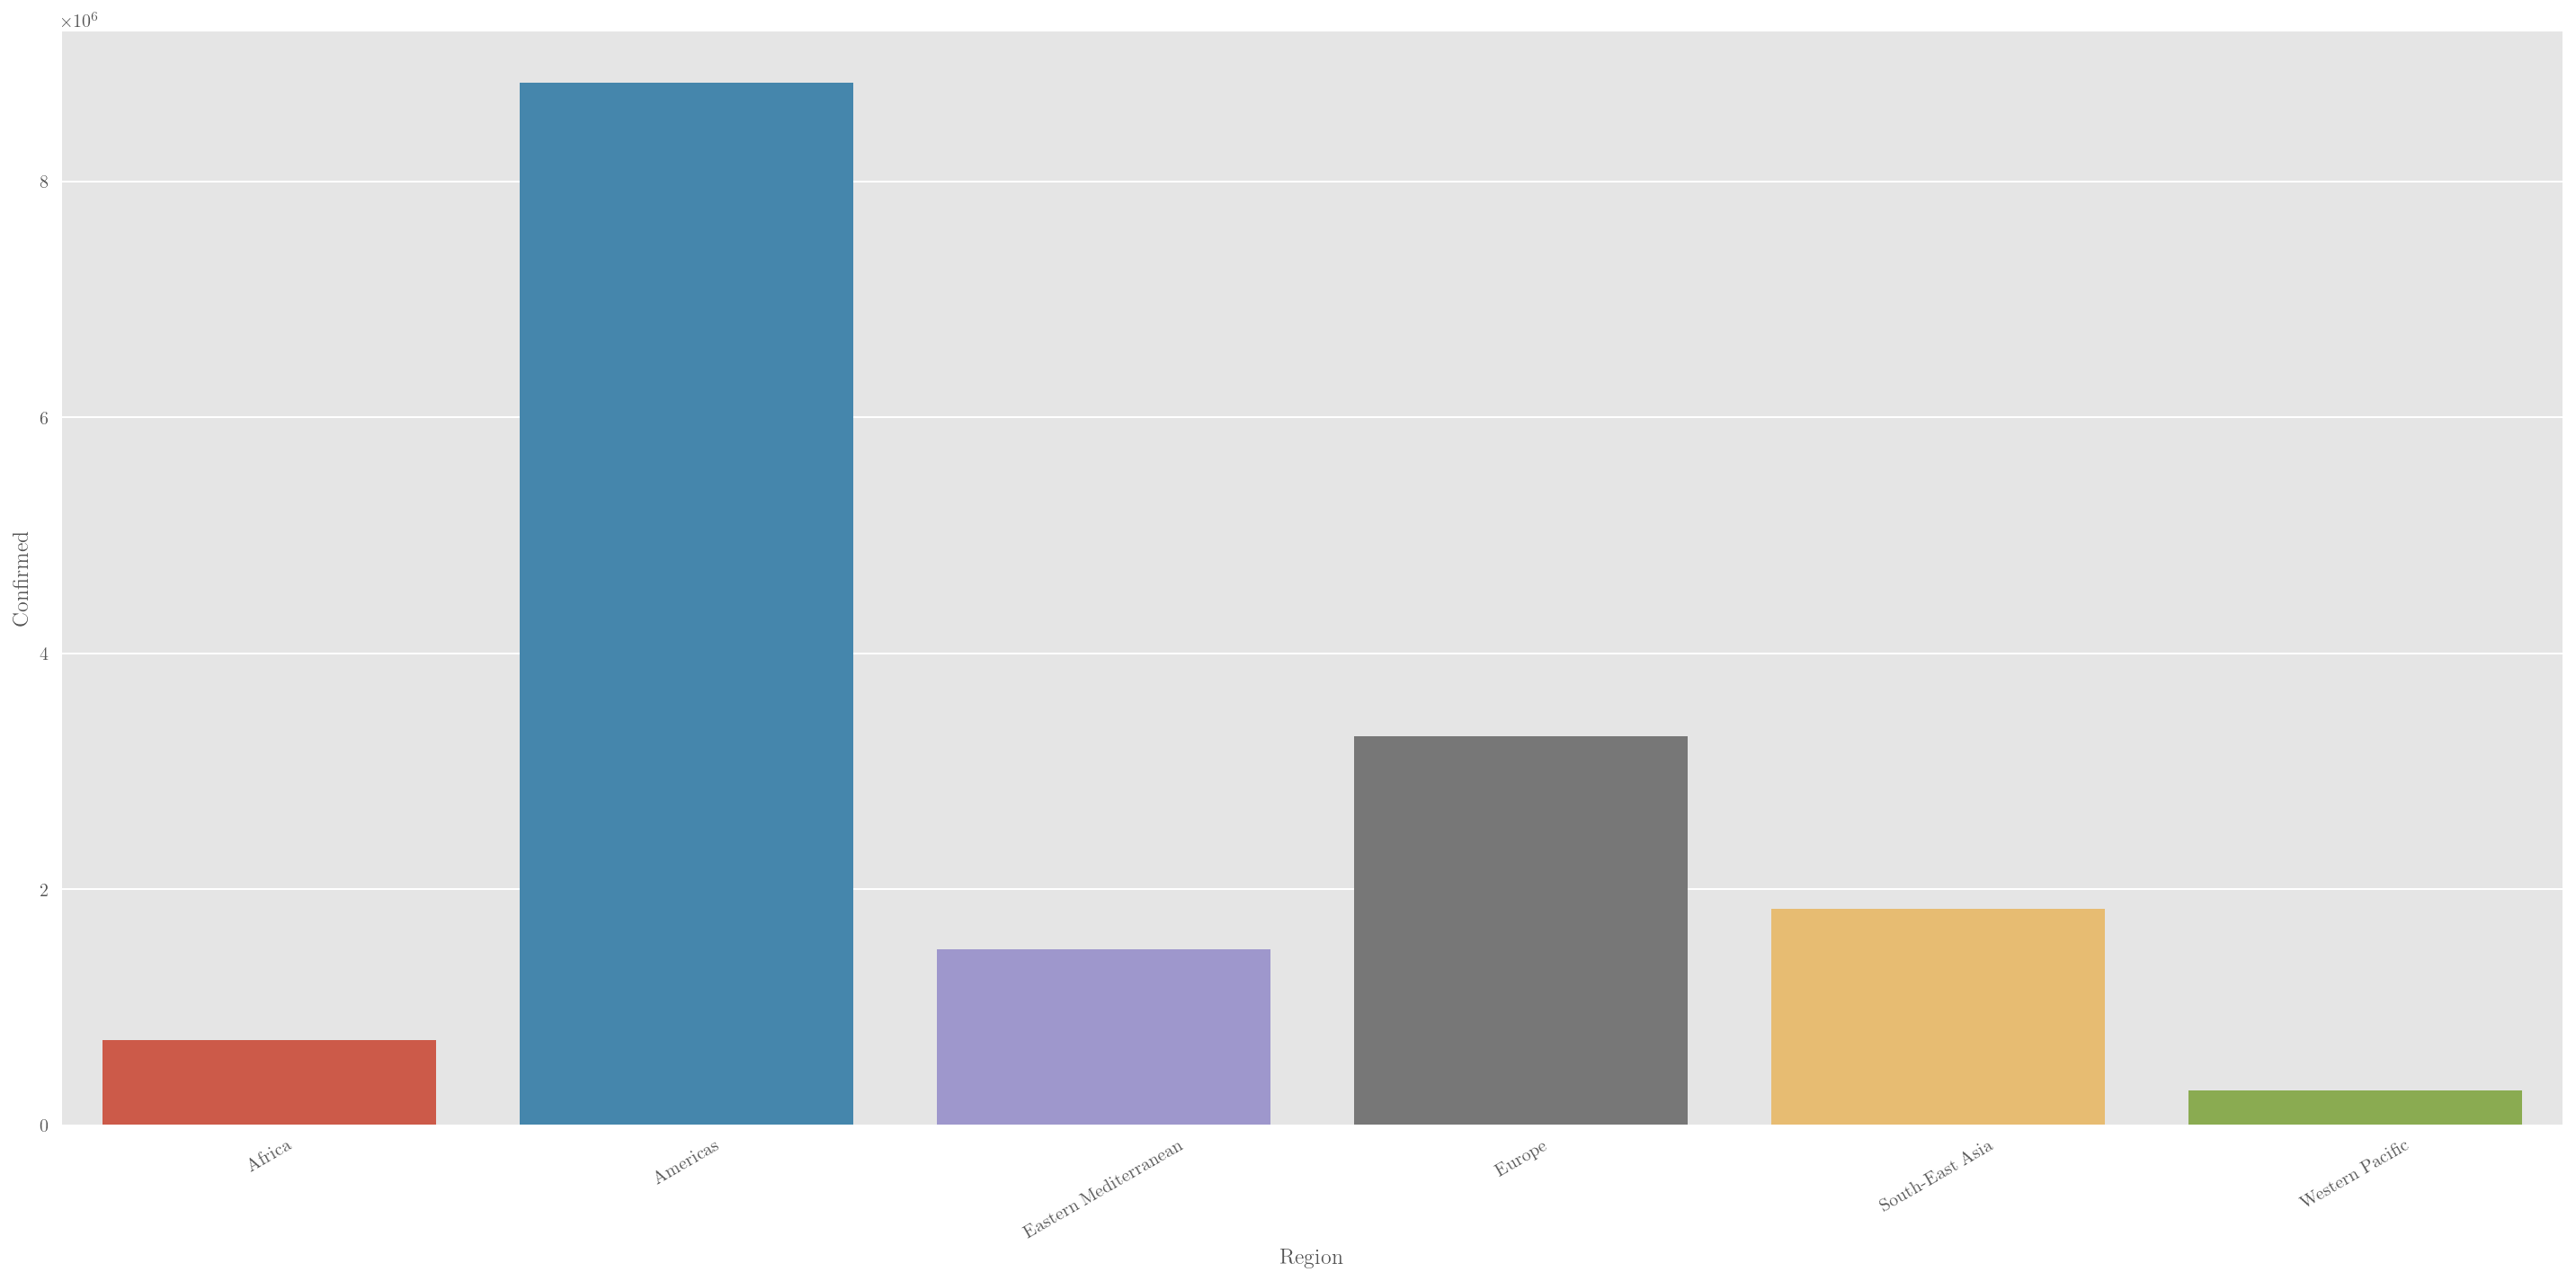

In [5]:
sns.barplot(x='Region', y='Confirmed', data=data)
plt.xticks(rotation=30)
plt.tight_layout()

### Format the y-axis

For this simple case, using the scientific notation for the y-axis seems to make it harder to get a sense of the numbers. So let's try using plain number format.

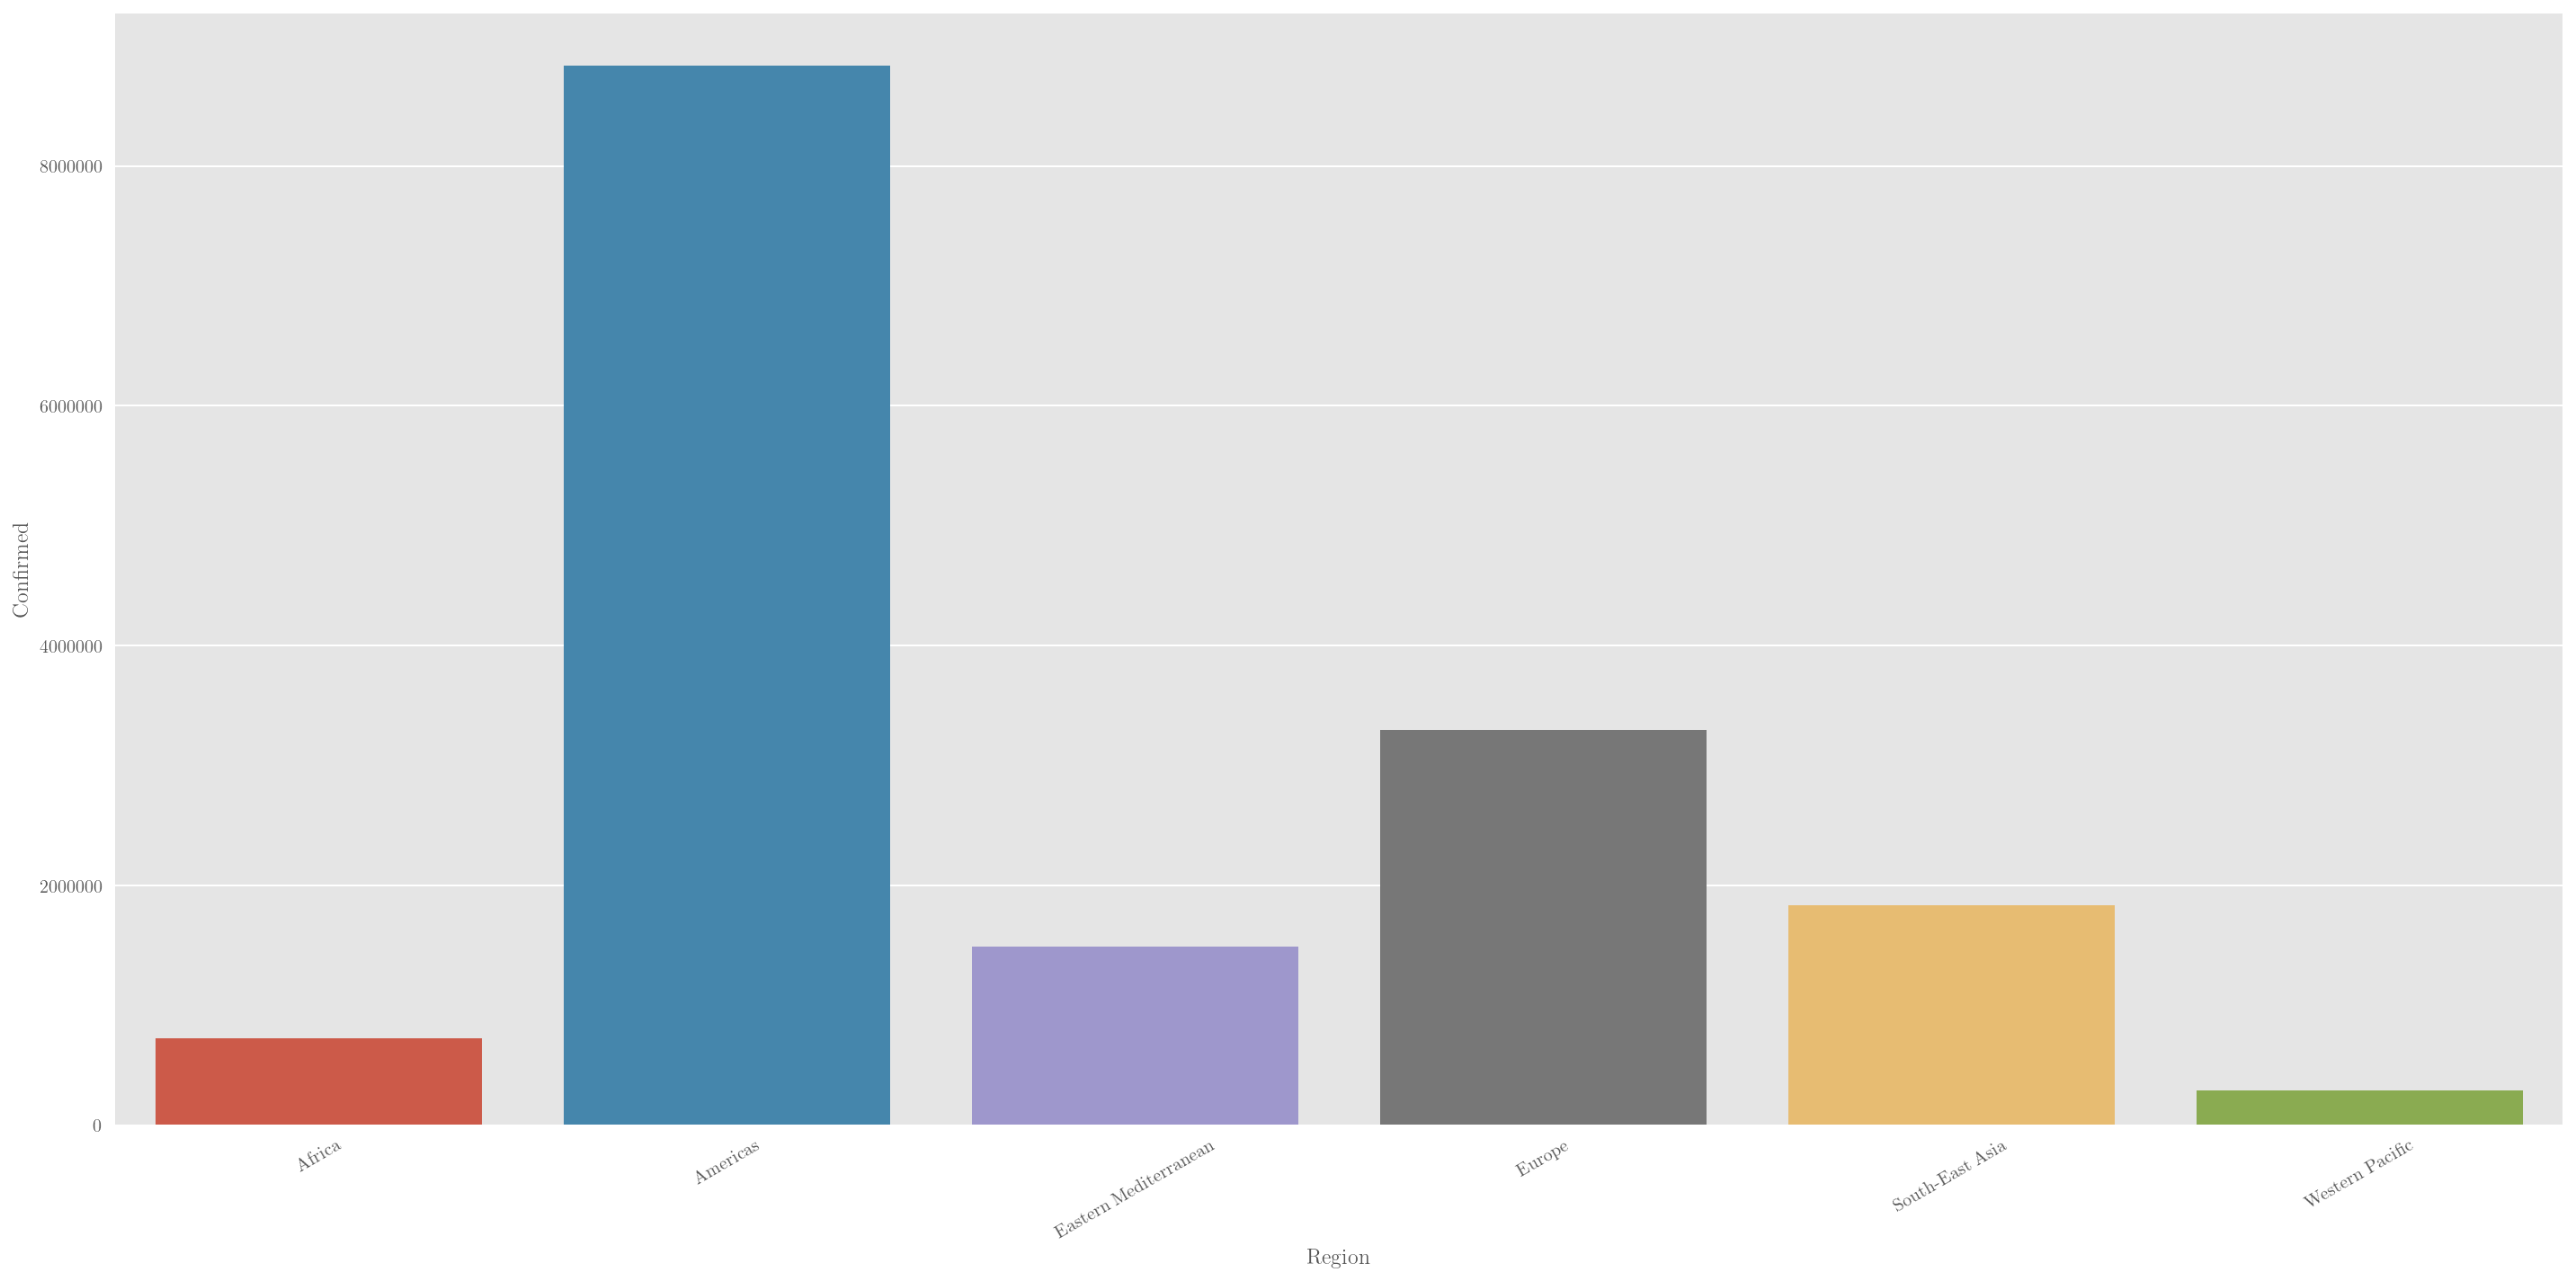

In [6]:
sns.barplot(x='Region', y='Confirmed', data=data)
plt.xticks(rotation=30)

plt.ticklabel_format(axis='y', style='plain')

plt.tight_layout()

### Try out the horizontal format?

We may be tempted to experiment with a horizontal layout of the graph instead. First, let us hit the `Stop` on the previous plot, so we can start a new plot in the horizontal format.

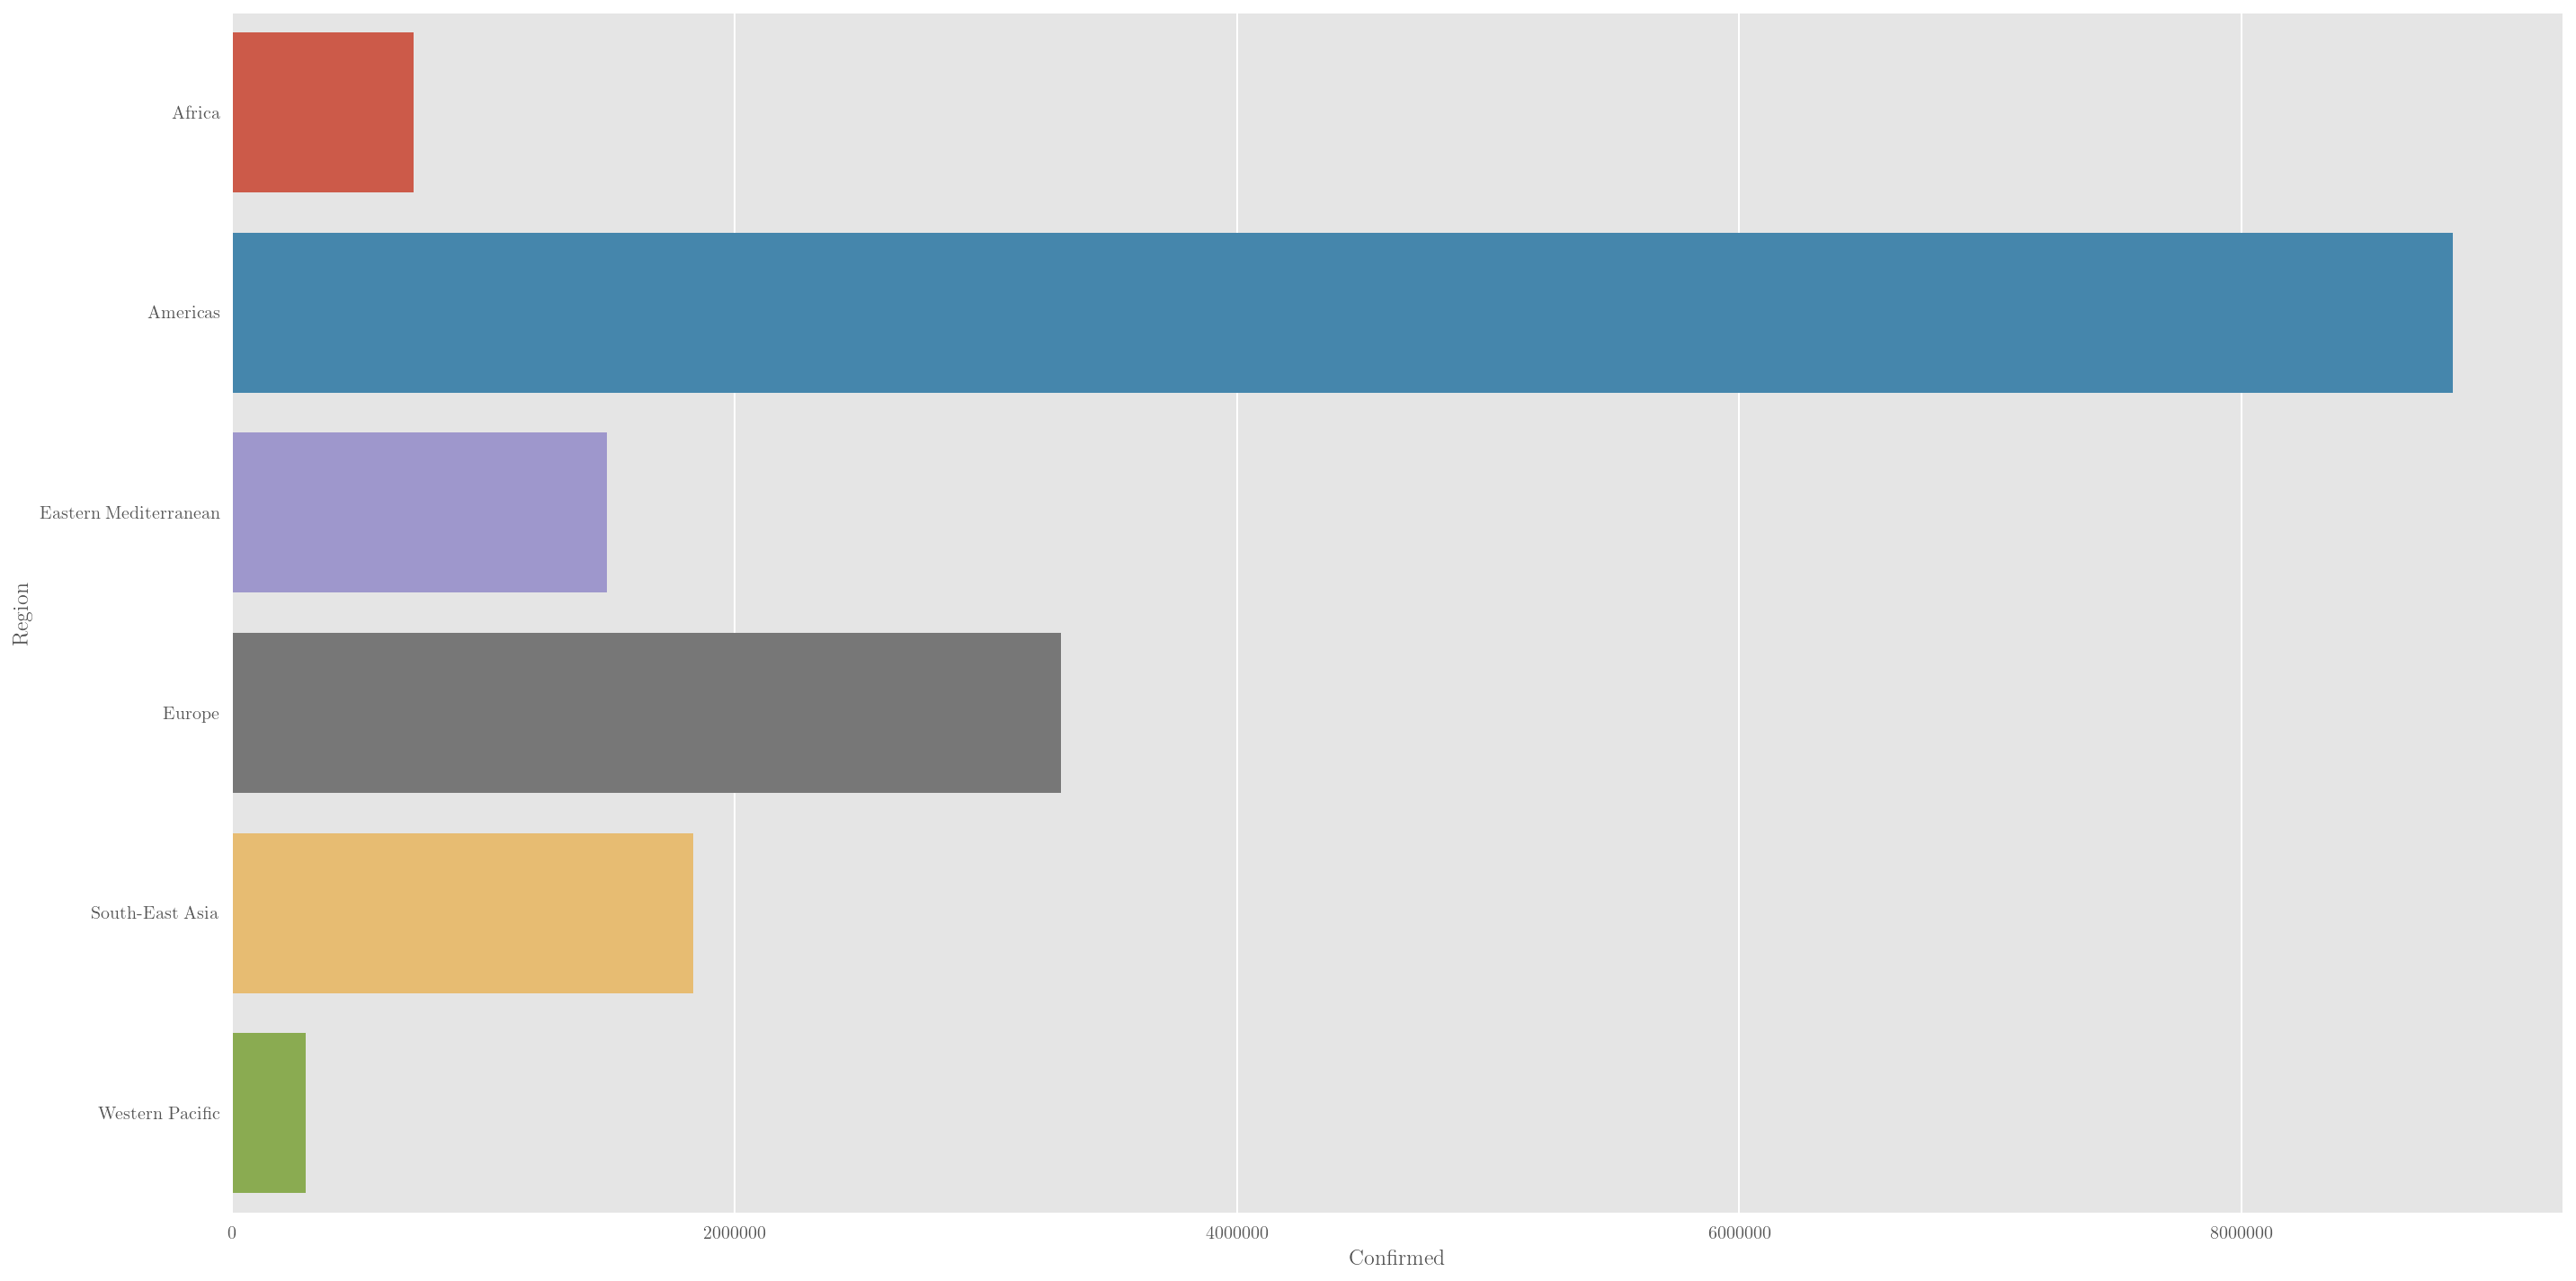

In [7]:
sns.barplot(y='Region', x='Confirmed', data=data)
plt.ticklabel_format(axis='x', style='plain')

plt.tight_layout()

### Sorting the bars by size

The easiest way is simply to sort the underlying dataframe, before passing it to the plotting function.

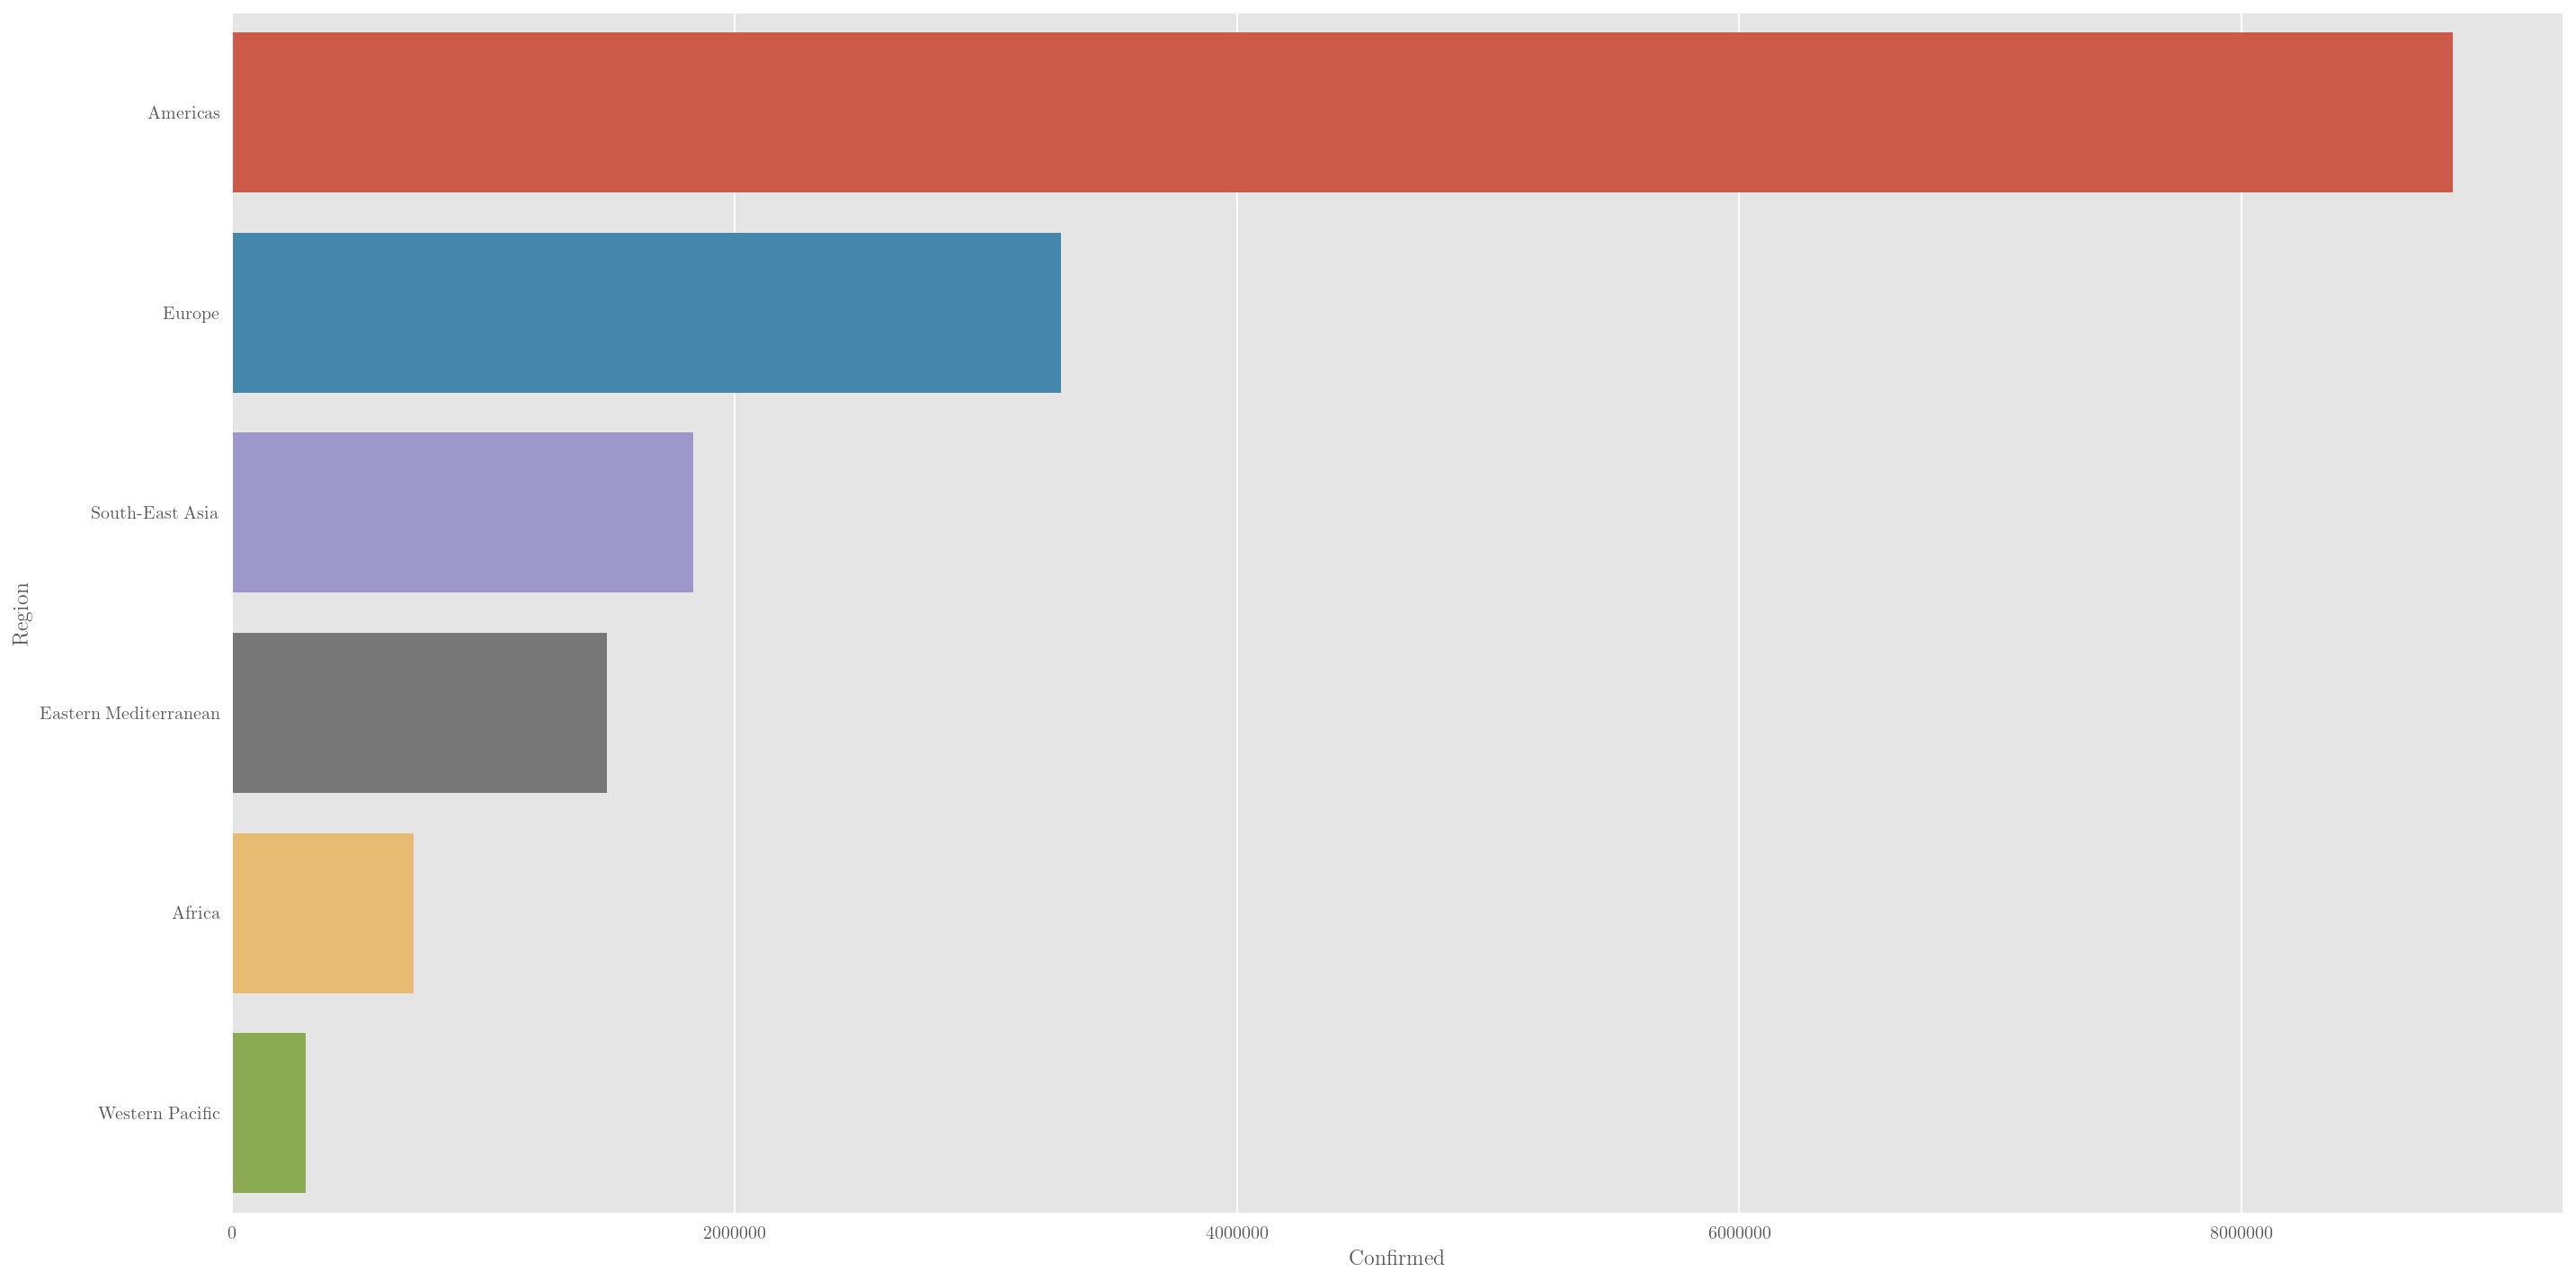

In [8]:
data.sort_values(by='Confirmed', inplace=True, ascending=False)

sns.barplot(y='Region', x='Confirmed', data=data)
plt.ticklabel_format(axis='x', style='plain')

plt.tight_layout()

### Resizing the graph

The graph looks a bit too small-- perhaps we can set the size of the graph explicitly. Since we have already created the figure, we must get a handle on the figure and resize it, as shown below.

Alternatively, if we could have *guessed* an appropriate size of he graph, we could have used the code below to style it:

`
plt.rcParams[ 'figure.figsize' ] = '14,8'
`

But since we are interatively building the figure, let us instead now resize the graph.

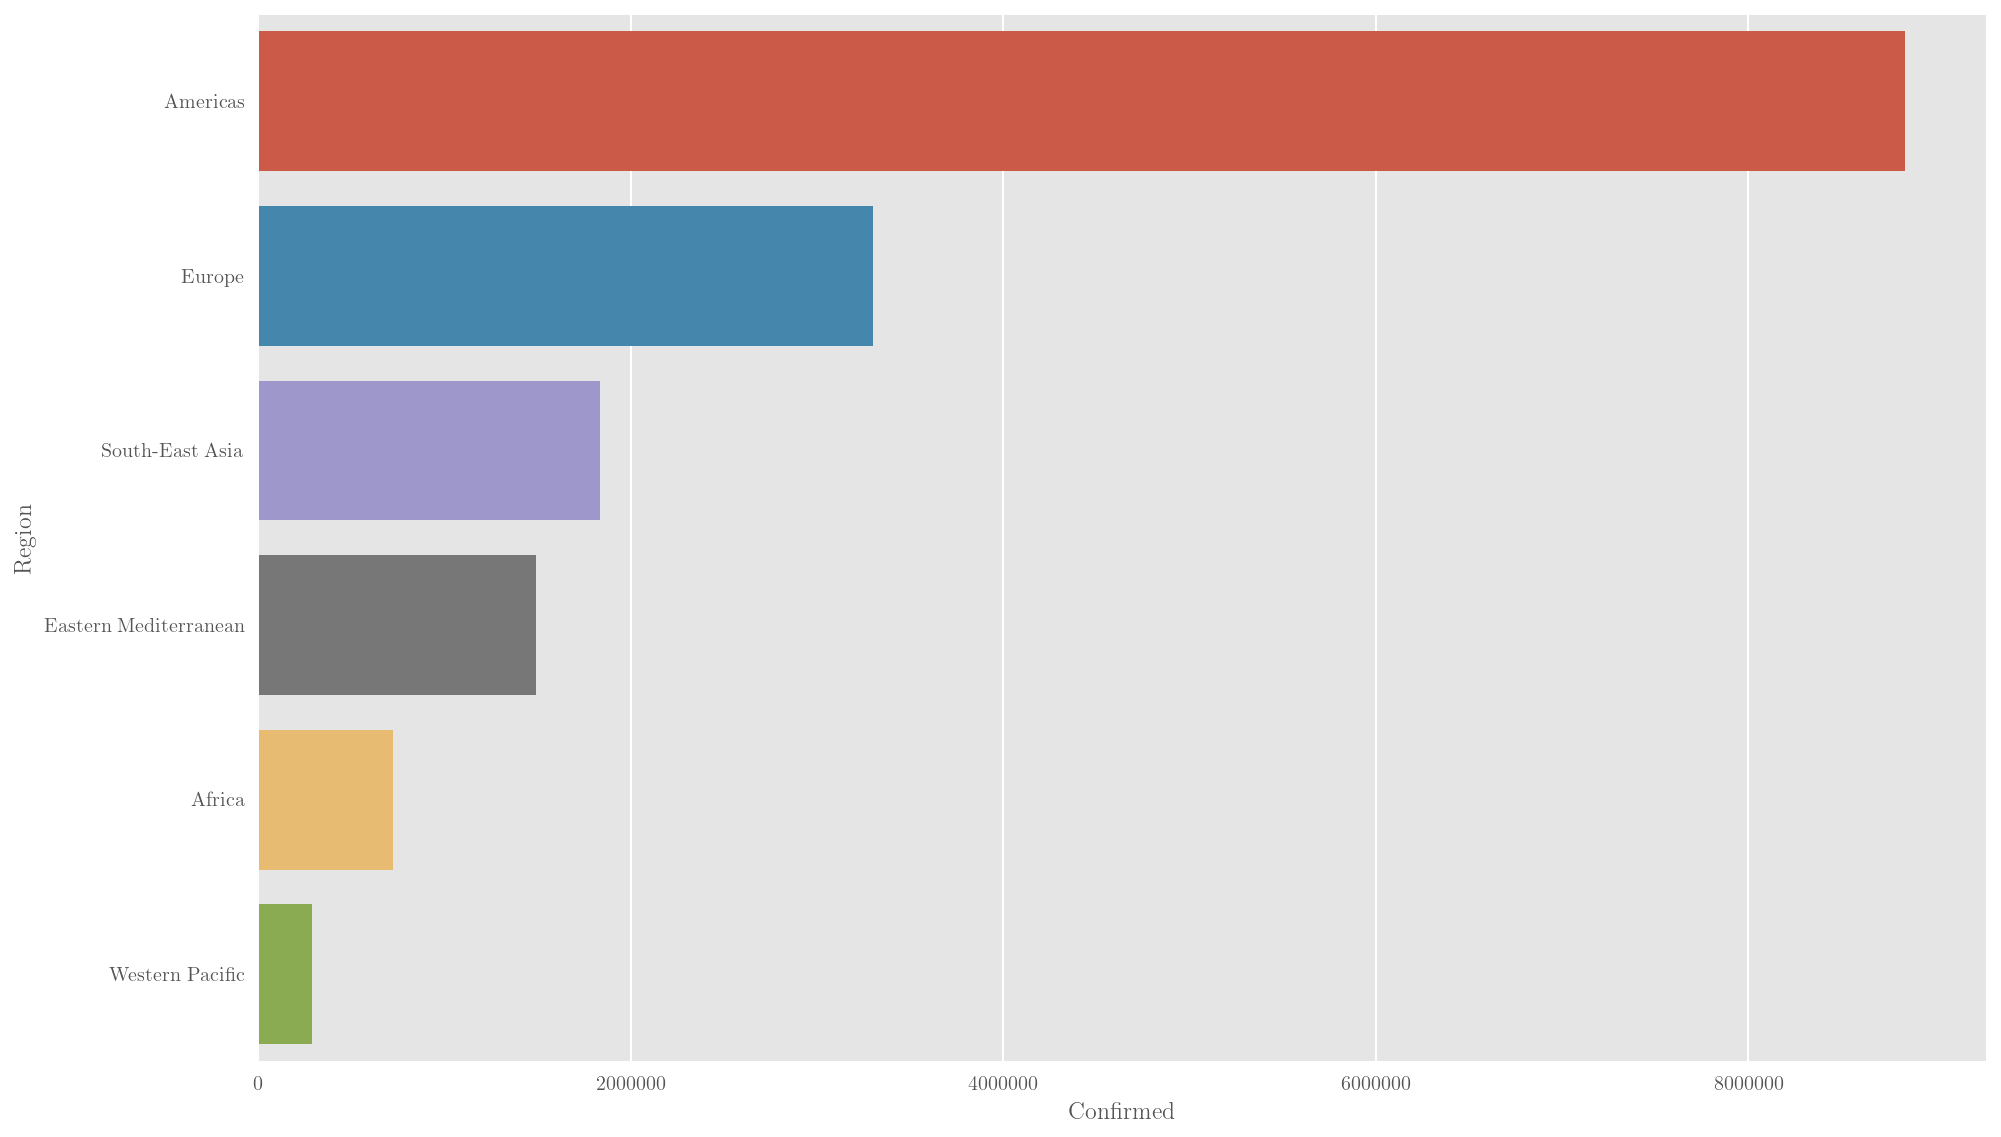

In [9]:
plt.rcParams[ 'figure.figsize' ] = '14,8'  #set the size

data.sort_values(by='Confirmed', inplace=True, ascending=False)
sns.barplot(y='Region', x='Confirmed', data=data)
plt.ticklabel_format(axis='x', style='plain')

plt.tight_layout()

### Adding the x-axis label

Let us be more explicit on what the x-axis is about.

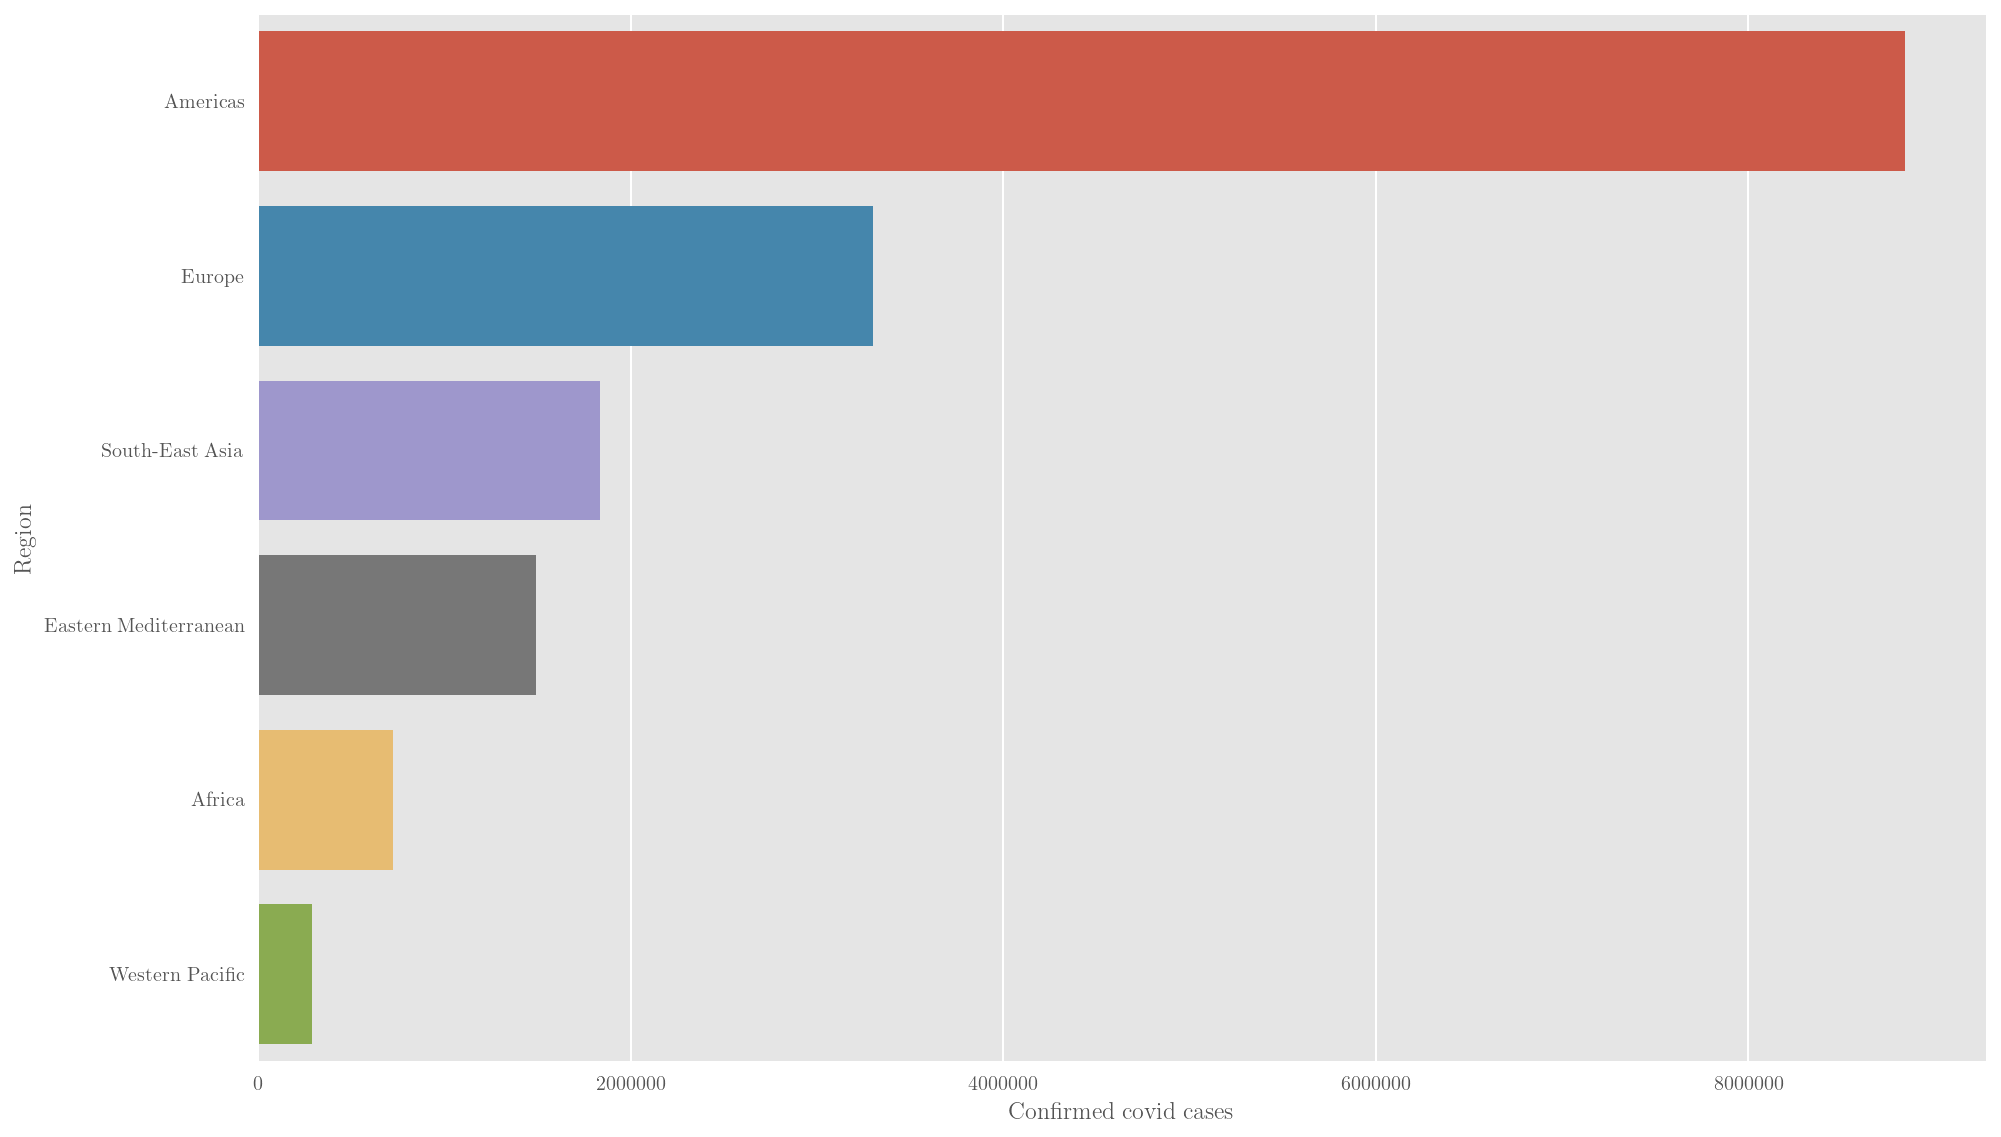

In [10]:
plt.rcParams[ 'figure.figsize' ] = '14,8'  #set the size

data.sort_values(by='Confirmed', inplace=True, ascending=False)
sns.barplot(y='Region', x='Confirmed', data=data)
plt.ticklabel_format(axis='x', style='plain')

plt.xlabel("Confirmed covid cases")

plt.tight_layout()


### Set a title to the figure

Unless there is a reason to, we should always specify a title to our figures.

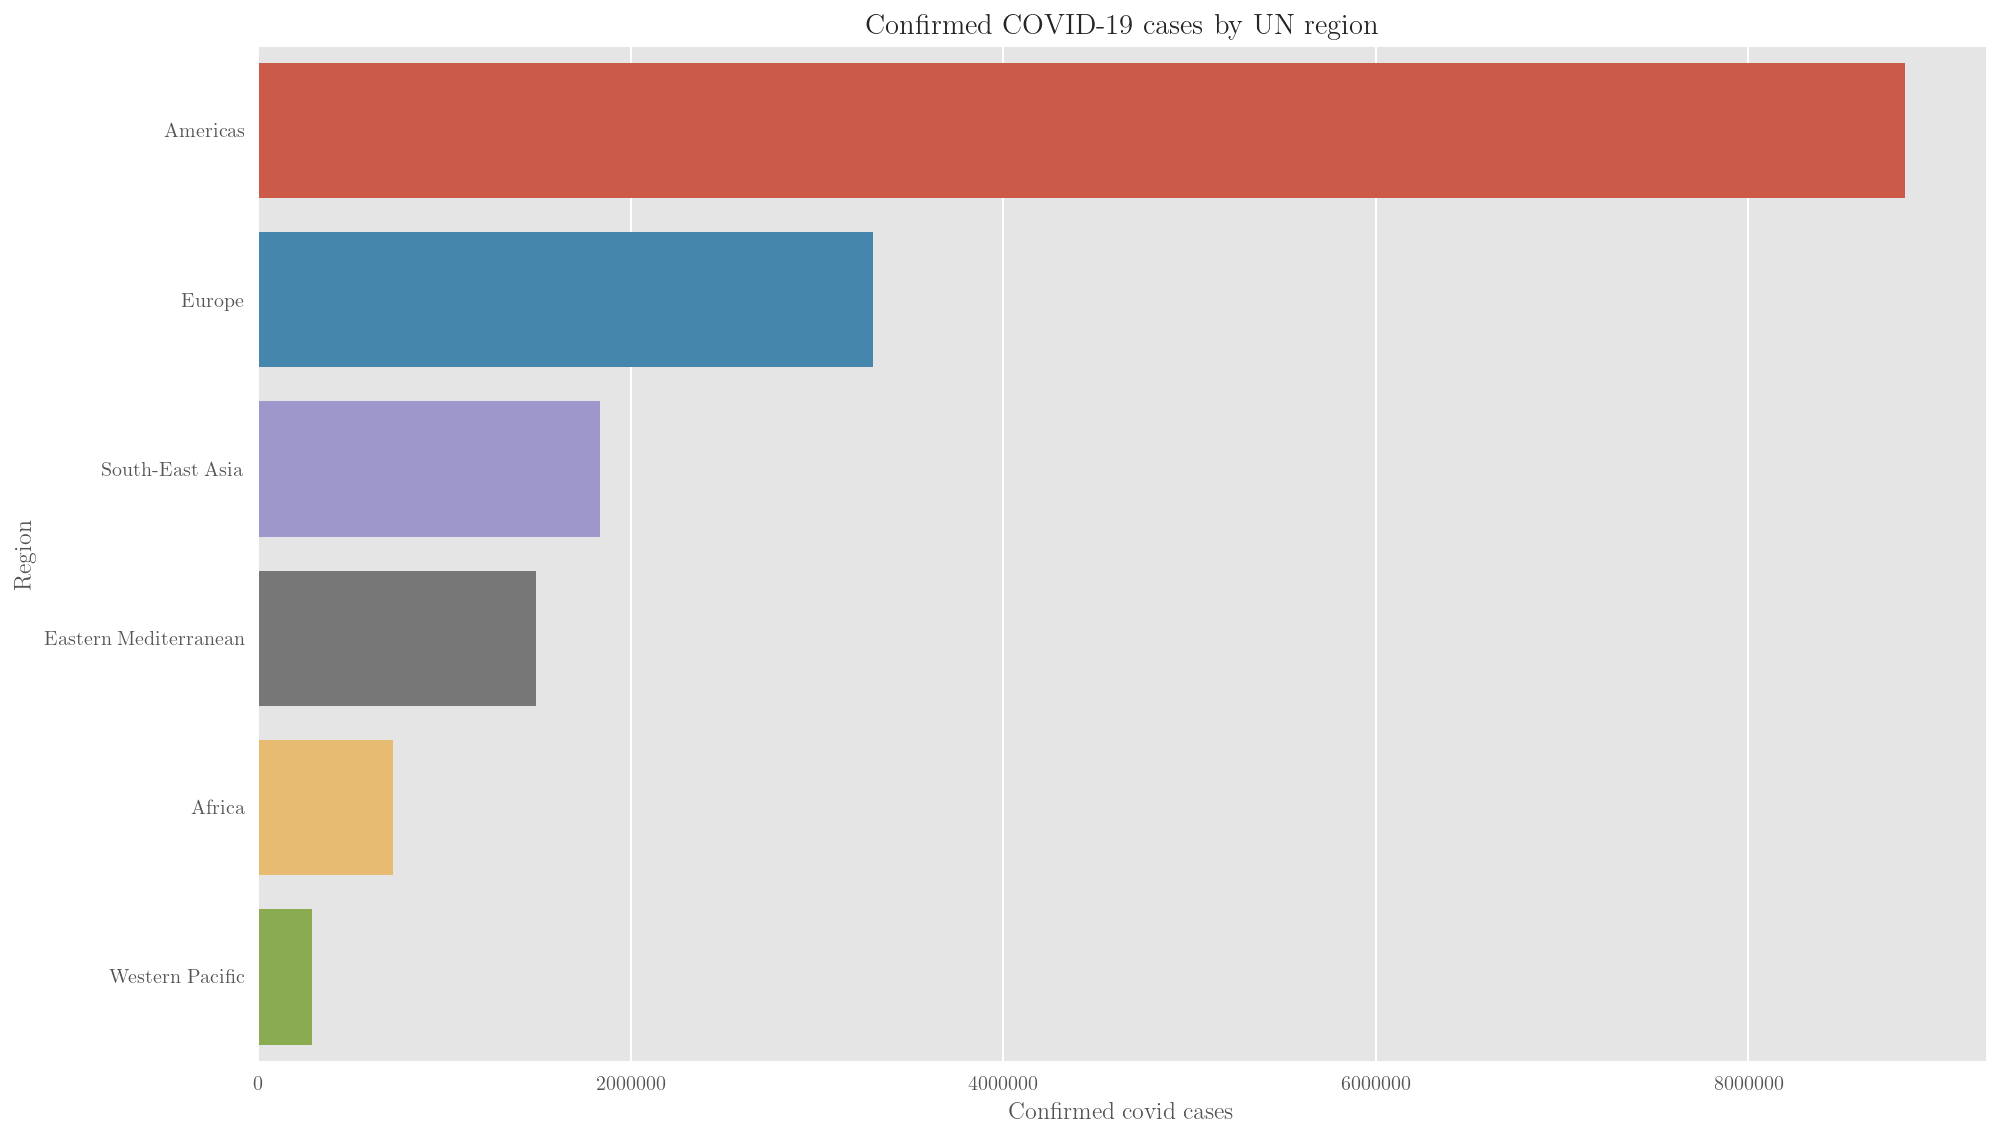

In [11]:
plt.rcParams[ 'figure.figsize' ] = '14,8'  #set the size
data.sort_values(by='Confirmed', inplace=True, ascending=False)
sns.barplot(y='Region', x='Confirmed', data=data)
plt.ticklabel_format(axis='x', style='plain')
plt.xlabel("Confirmed covid cases")

plt.title("Confirmed COVID-19 cases by UN region")

plt.tight_layout()

## Styling the figure

Now, the figure is informative; however, it looks rather bland. Let us apply some stylistic elements to the figure. There are many rendering themes that `matplotlib` provides, to choose from. <a href="https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html"> Select one from this gallery.</a>

A popular one is the `ggplot` style that gained considerable traction in the `R-programming` world. We can invoke that with the one-liner
`
plt.style.use ('ggplot') 
`

Next, let us style the fonts. The following lines of code are essentially self-descriptive. Note that you also specify the `dpi` of your monitor, in case you are using a high-end monitor. (Look up its dpi value in your computer, and specify it.)

```
plt.rcParams[ 'legend.fontsize' ] = 13                   # legend font size
plt.rcParams[ 'axes.labelsize' ] = 13                    # axis label font size
plt.rcParams['figure.dpi'] = 144                         # high-dpi monitors support
```

**Note:** Since we are styling the figure, we will have to start all over again with a new one. In the below, we have first set the styling elements, and then recreated the figure based on what we have learned so far.

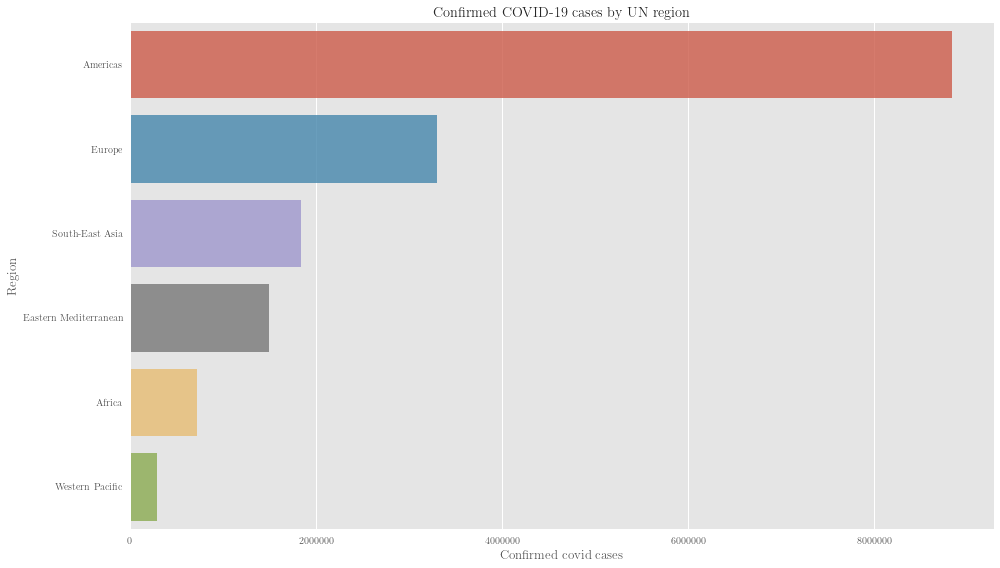

In [12]:
plt.style.use ('ggplot')                                 # emulate ggplot style
plt.rcParams[ 'legend.fontsize' ] = 13                   # legend font size
plt.rcParams[ 'axes.labelsize' ] = 13                    # axis label font size
plt.rcParams['figure.dpi'] = 72                          # high-dpi monitors support

plt.rcParams[ 'figure.figsize' ] = '14,8'  #set the size
data.sort_values(by='Confirmed', inplace=True, ascending=False)
sns.barplot(y='Region', x='Confirmed',alpha=0.8, data=data)
plt.ticklabel_format(axis='x', style='plain')
plt.xlabel('Confirmed covid cases')
plt.title('Confirmed COVID-19 cases by UN region')

plt.tight_layout()

### Using LaTeX rendering of text

In general, text looks more professional if typeset in $\LaTeX$. Therefore, let add that element, and see how it affects our figure.

Along the way, let us focus on some other aspects of the font-sizes, etc. to improve the aesthetics.

**WARNING**: You must have installed $\LaTeX$ software on your machine. If it does not exist, go over to the <a href="https://www.tug.org/texlive/">Texlive </a> website, and install it from there.

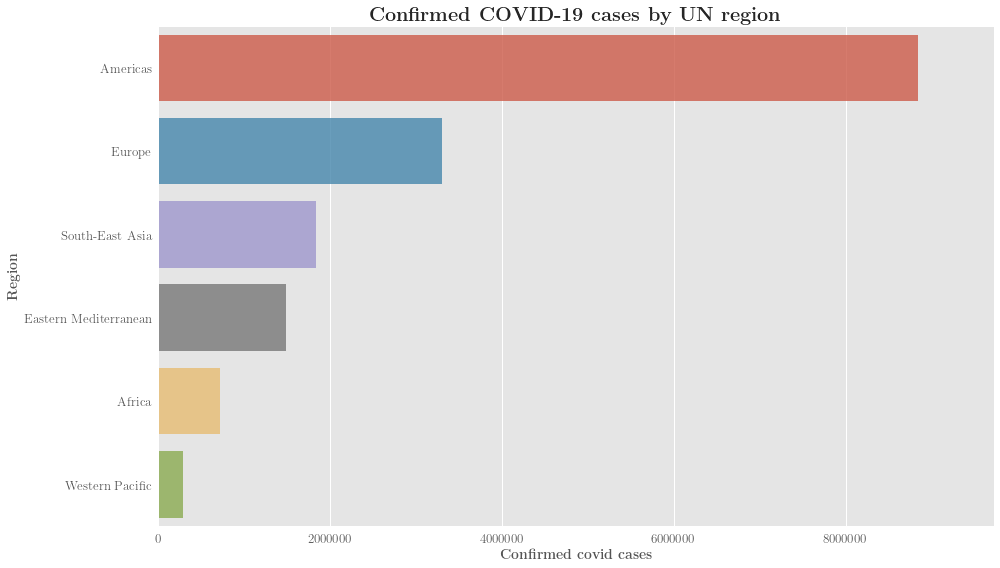

In [13]:

# For latex-quality, i.e., publication quality legends and labels on graphs.
# Warning: you must have installed LaTeX on your system.
from matplotlib import rc
rc ('font', family='serif')
rc ('text', usetex=True) # Enable it selectively 
rc ('font', size=16)




plt.style.use ('ggplot')                      # emulate ggplot style
plt.rcParams['legend.fontsize' ] = 13         # legend font size
plt.rcParams[ 'axes.labelsize' ] = 13         # axis label font size
plt.rcParams['figure.dpi'] = 72   
plt.rcParams[ 'figure.figsize' ] = '14,8'

# Now, plot the barchart
data.sort_values(by='Confirmed', inplace=True, ascending=False)
sns.barplot(y='Region', x='Confirmed', alpha=0.8, data=data)

plt.xlim(0, 1.1*max(data.Confirmed))          # expand the x-limit a little bit,
                                              # so that it looks a bit more pleasing

plt.xticks(fontsize=13)                       # font size of the ticks
plt.yticks(fontsize=13)
plt.ticklabel_format(axis='x', style='plain') 

plt.xlabel(r'\textbf{Confirmed covid cases}', 
           size=14)                           # note the use of explicit LaTeX formatting language
plt.ylabel(r'\textbf{Region}', size=14)       # also note the explicit specification of font size

plt.title(r'\textbf{Confirmed COVID-19 cases by UN region}', size=20)
plt.tight_layout()

### Adding the values explicitly to the bars

Perhaps the values are not quite easy to infer accurately in the figure above. To help the reader,let us add it adjacent to each bar. For this, we need the index of each bar, and need to pick the data value from the dataframe for that index.

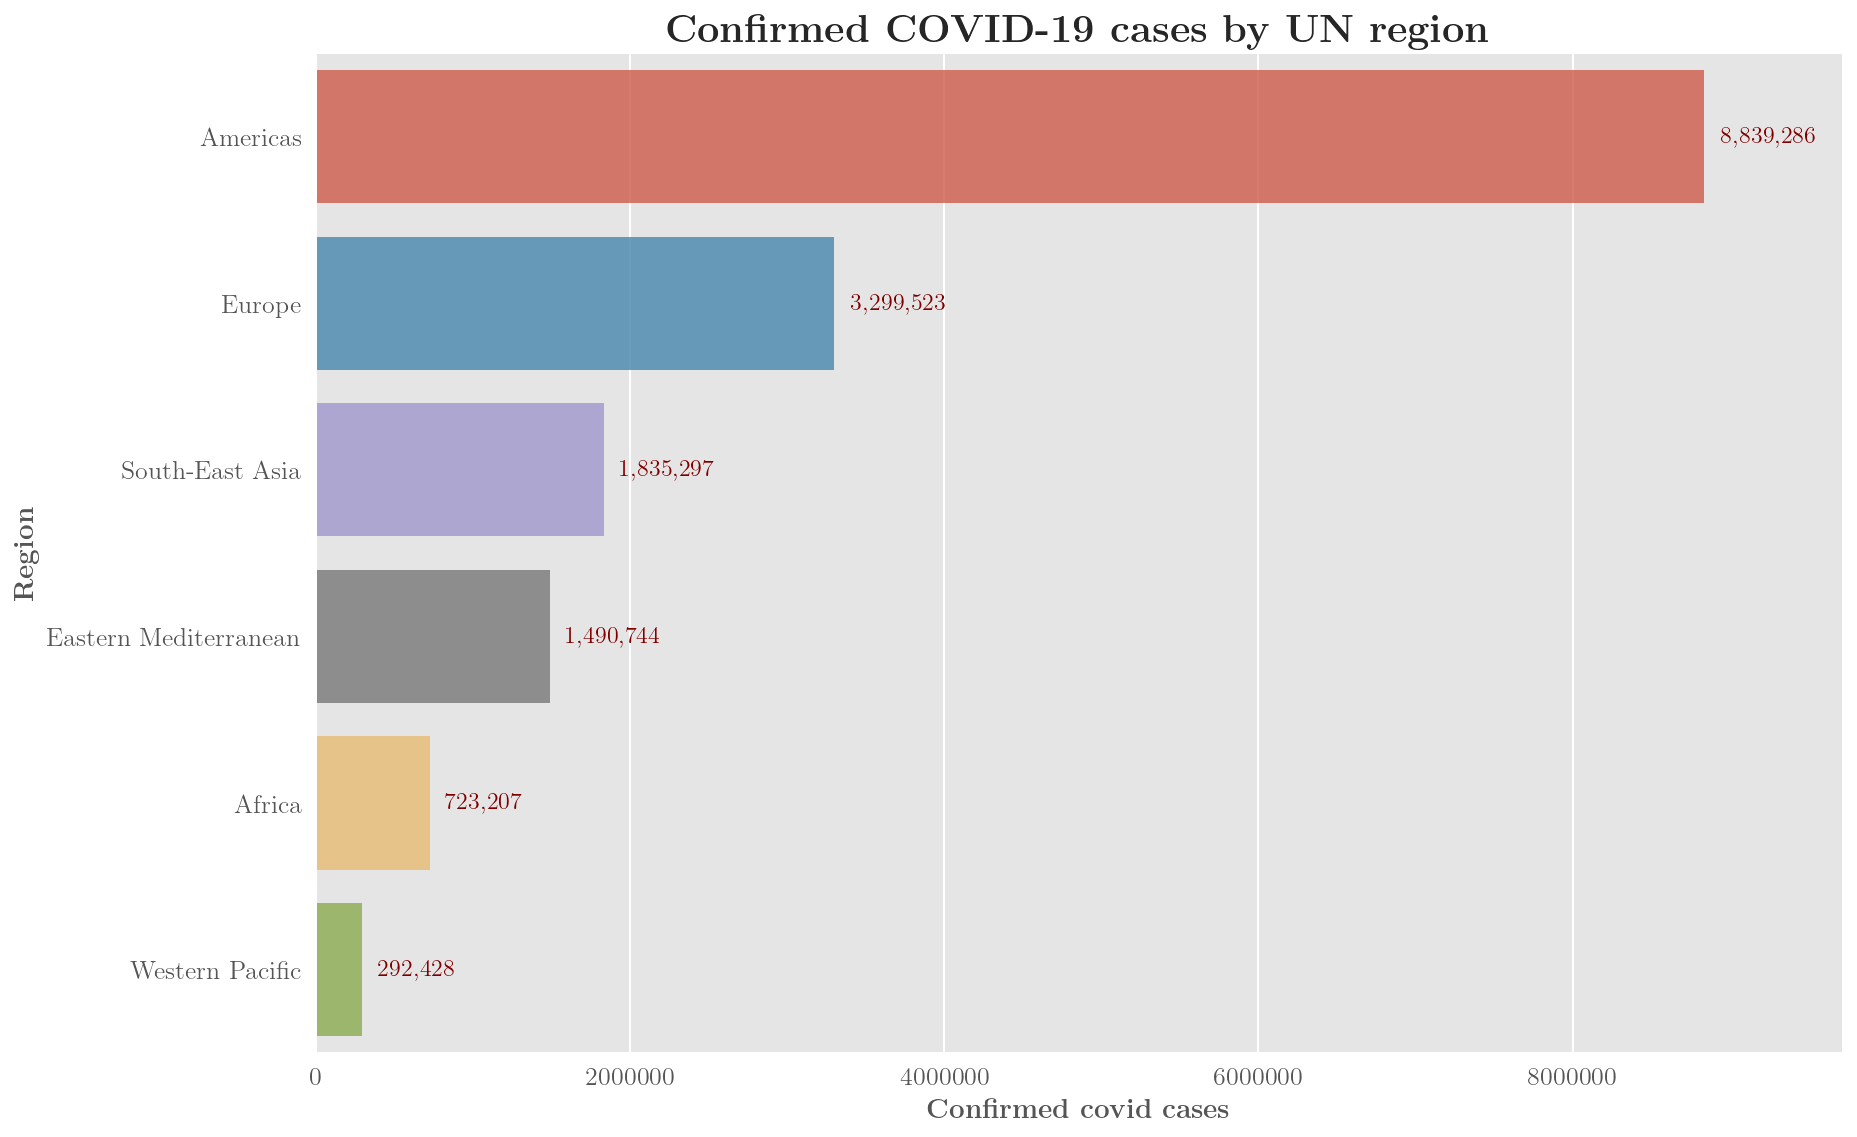

In [14]:
%matplotlib inline

import locale
locale.setlocale(locale.LC_ALL, '')          # for comma-separated values formatting.


# For latex-quality, i.e., publication quality legends and labels on graphs.
# Warning: you must have installed LaTeX on your system.
from matplotlib import rc
rc ('font', family='serif')
rc ('text', usetex=True) # Enable it selectively 
rc ('font', size=16)




plt.style.use ('ggplot')                      # emulate ggplot style
plt.rcParams['legend.fontsize' ] = 16         # legend font size
plt.rcParams[ 'axes.labelsize' ] = 16         # axis label font size
plt.rcParams['figure.dpi'] = 144   
plt.rcParams[ 'figure.figsize' ] = '13,8'

# Now, plot the barchart
data.sort_values(by='Confirmed', inplace=True, ascending=False)
sns.barplot(y='Region', x='Confirmed',  data=data, alpha=0.8)


plt.xlim(0, 1.1*max(data.Confirmed))          # expand the x-limit a little bit,
                                              # so that it looks a bit more pleasing


plt.xticks(fontsize=13)                       # font size of the ticks
plt.yticks(fontsize=13)
plt.ticklabel_format(axis='x', style='plain') # use plain number format (not scientific)

plt.xlabel(r'\textbf{Confirmed covid cases}', 
           size=14)                           # note the use of explicit LaTeX formatting language
plt.ylabel(r'\textbf{Region}', size=14)       # also note the explicit specification of font size


plt.title(r'\textbf{Confirmed COVID-19 cases by UN region}', size=20)

# Finally, add the values adjacent to the bar
for index, value in enumerate(data.Confirmed):

    plt.text(value+100000,                   # add a little bit of padding offset
             index,                          # the index location of the bar
             f'{value:n}',                   # the value to put
             color='maroon',                 # color of the value 
             va='center',                    # vertically align to the center of the bar
             size=12)                        # a good font size for the values
    
plt.tight_layout()

Compare this to the original figure: <img src='seaborn-bar.png'>

## A minimalistic approach

Let us remove, without diminishing the comprehensibility of the plot:

* the grid,
* the `x-ticks`
* the splines
* color to white, by changing the theme to `fast`

We can do this with the following invocations:
```{python}
plt.xticks([])                               # set x labels to be empty
plt.grid(False)


ax = plt.gca()
for spine in ax.spines.values():
    spine.set_visible(False)                # Hide the splines
```


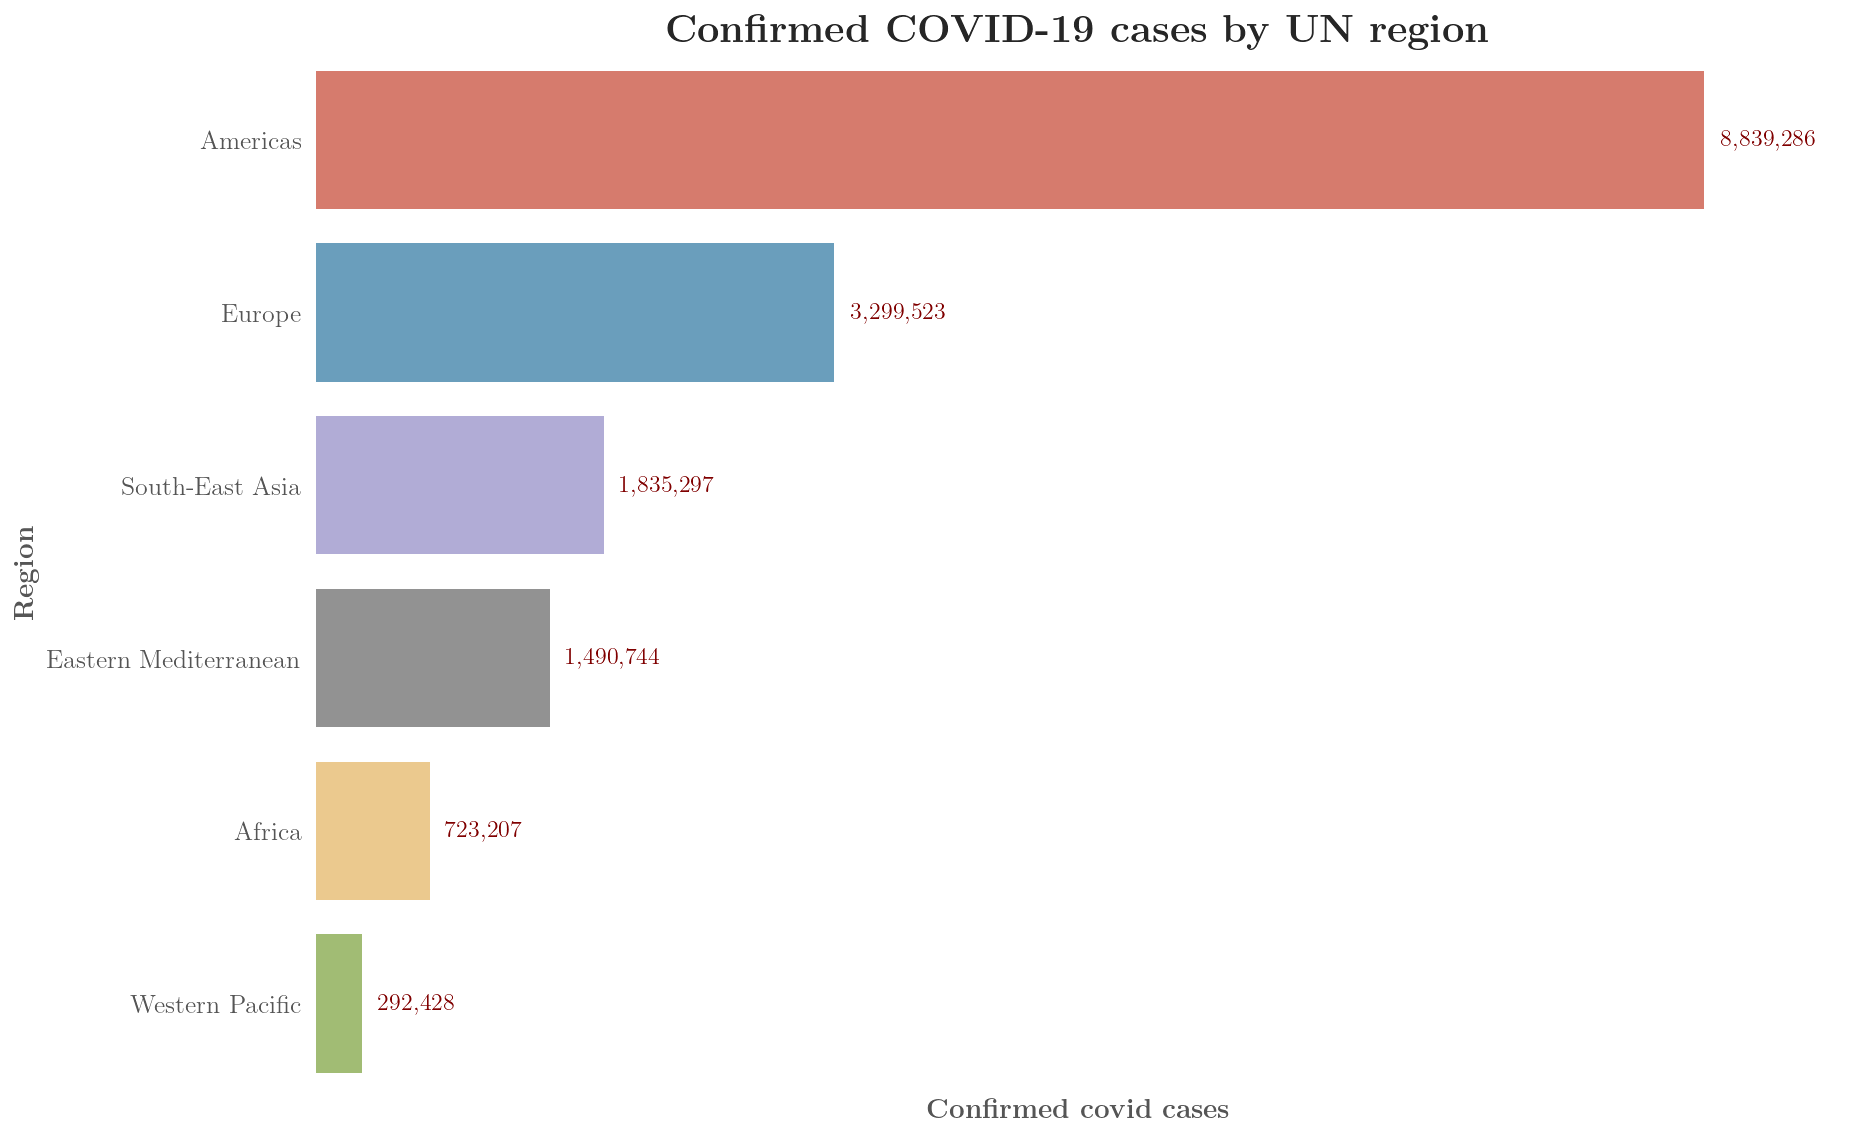

In [15]:
import locale
locale.setlocale(locale.LC_ALL, '')          # for comma-separated values formatting.


# For latex-quality, i.e., publication quality legends and labels on graphs.
# Warning: you must have installed LaTeX on your system.
from matplotlib import rc
rc ('font', family='serif')
rc ('text', usetex=True) # Enable it selectively 
rc ('font', size=16)




plt.style.use ('ggplot')                      # emulate ggplot style
plt.rcParams['legend.fontsize' ] = 16         # legend font size
plt.rcParams[ 'axes.labelsize' ] = 16         # axis label font size
plt.rcParams['figure.dpi'] = 144   
plt.rcParams[ 'figure.figsize' ] = '13,8'

# Now, plot the barchart
data.sort_values(by='Confirmed', inplace=True, ascending=False)
sns.barplot(y='Region', x='Confirmed',  data=data, alpha=0.8)


plt.xlim(0, 1.1*max(data.Confirmed))          # expand the x-limit a little bit,
                                              # so that it looks a bit more pleasing



plt.yticks(fontsize=13)
plt.ticklabel_format(axis='x', style='plain') # use plain number format (not scientific)

plt.xlabel(r'\textbf{Confirmed covid cases}', 
           size=14)                           # note the use of explicit LaTeX formatting language
plt.ylabel(r'\textbf{Region}', size=14)       # also note the explicit specification of font size


plt.title(r'\textbf{Confirmed COVID-19 cases by UN region}', size=20)

# Finally, add the values adjacent to the bar
for index, value in enumerate(data.Confirmed):

    plt.text(value+100000,                   # add a little bit of padding offset
             index,                          # the index location of the bar
             f'{value:n}',                   # the value to put
             color='maroon',                 # color of the value 
             va='center',                    # vertically align to the center of the bar
             size=12)                        # a good font size for the values


# Towards minimalism

plt.xticks([])                               # set x labels to be empty
plt.grid(False)
ax = plt.gca()
ax.set_facecolor('w')                        # set the background to white
# Hide the splines
for spine in ax.spines.values():
    spine.set_visible(False)

plt.tight_layout()

## Multi-bars

How would we plot not just the feature `Confirmed` but also, say, `Deaths` in the same bar-plot? It turns out this is quite easy.

In [16]:
mm = pd.melt(data[['Region', 'Confirmed', 'Deaths']], id_vars=['Region'])

mm


,Region,variable,value
0,Americas,Confirmed,8839286
1,Europe,Confirmed,3299523
2,South-East Asia,Confirmed,1835297
3,Eastern Mediterranean,Confirmed,1490744
4,Africa,Confirmed,723207
5,Western Pacific,Confirmed,292428
6,Americas,Deaths,342732
7,Europe,Deaths,211144
8,South-East Asia,Deaths,41349
9,Eastern Mediterranean,Deaths,38339


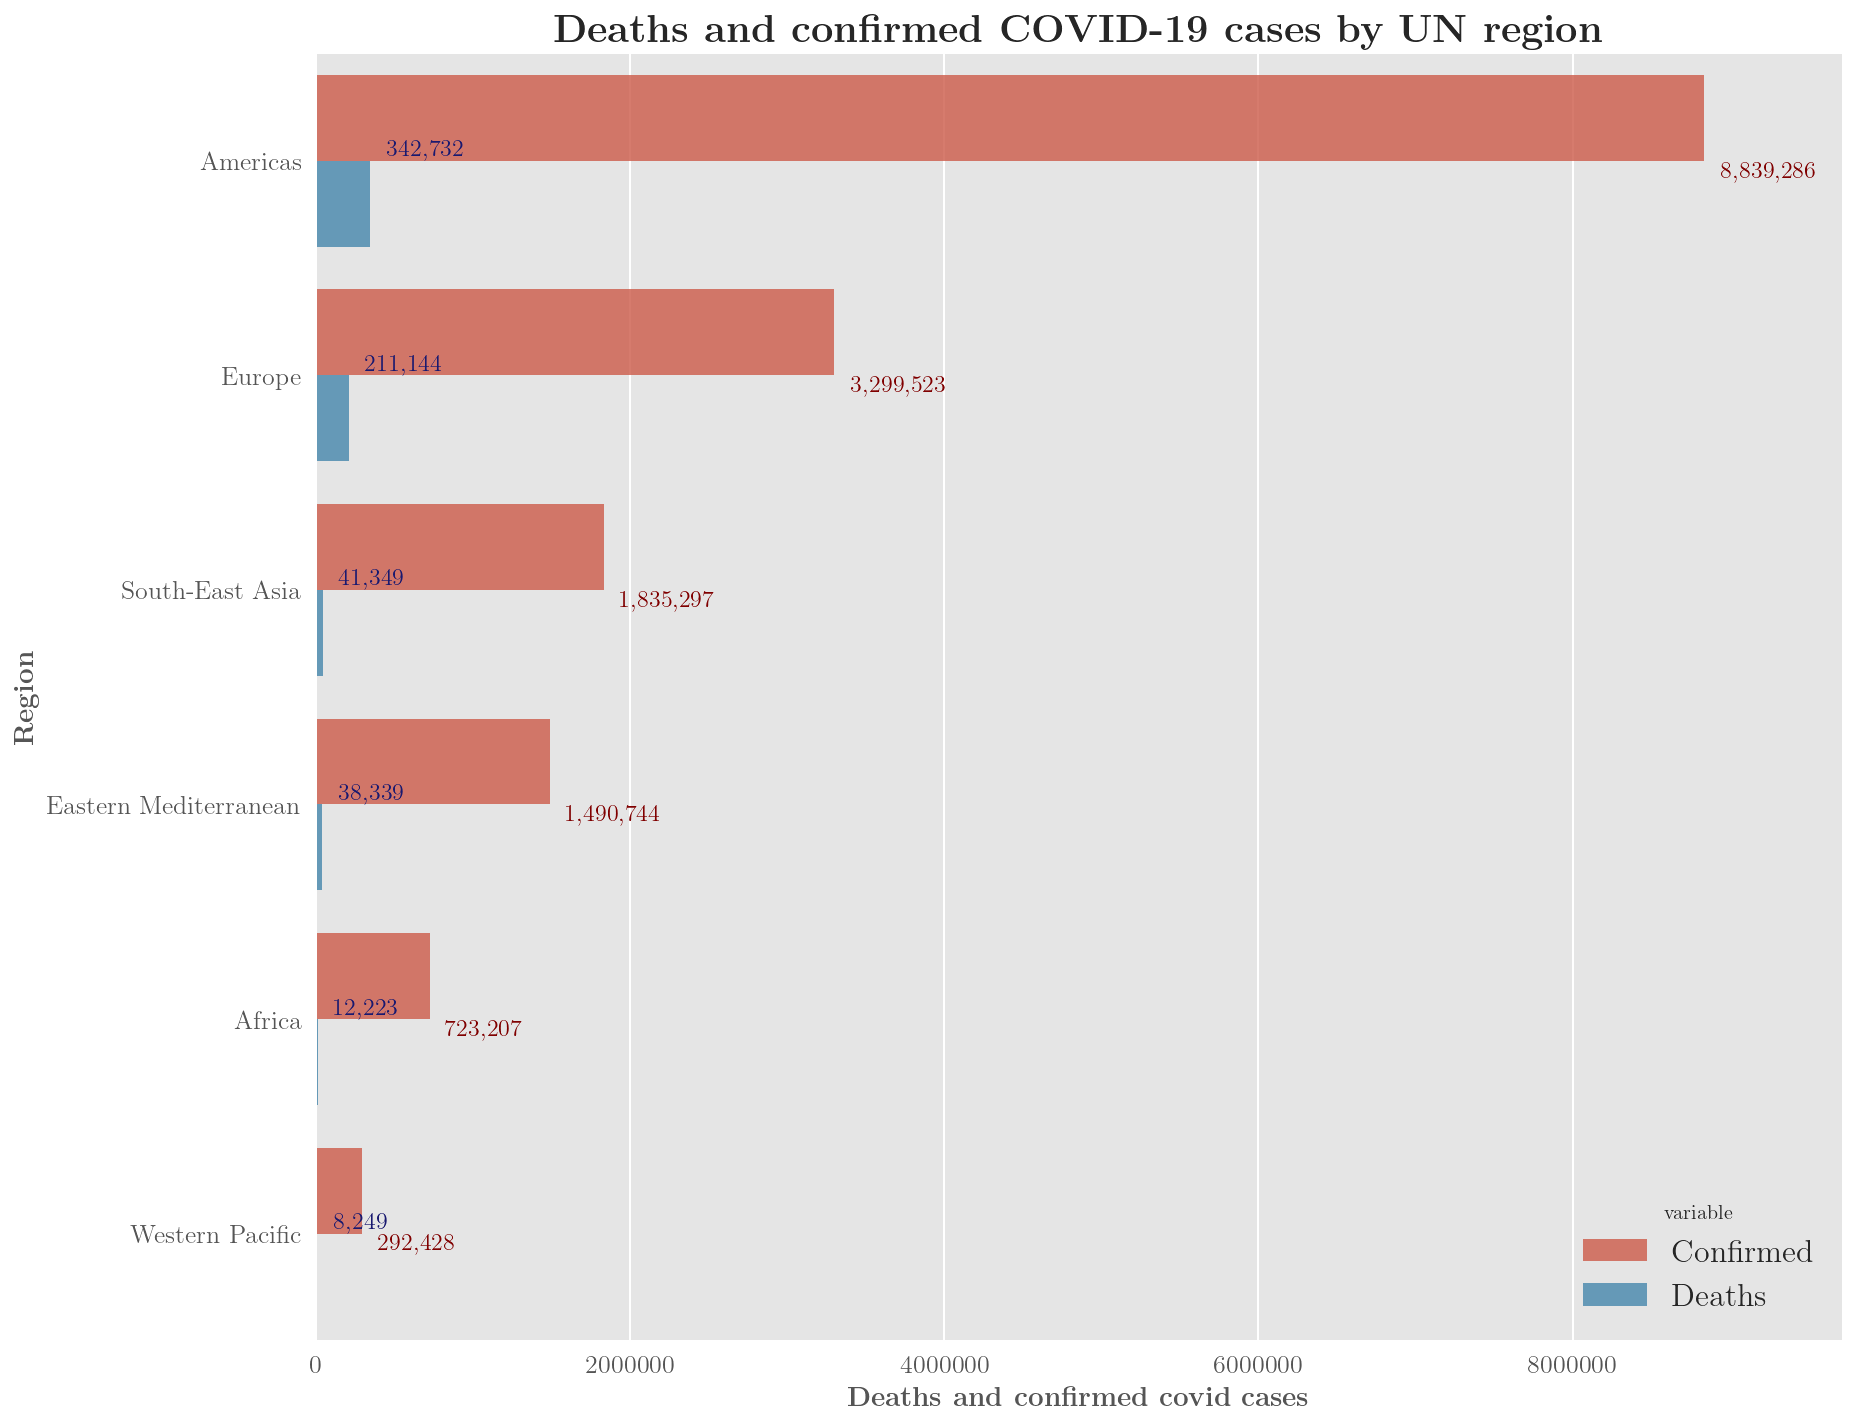

In [17]:
%matplotlib inline

import locale
locale.setlocale(locale.LC_ALL, '')          # for comma-separated values formatting.


# For latex-quality, i.e., publication quality legends and labels on graphs.
# Warning: you must have installed LaTeX on your system.
from matplotlib import rc
rc ('font', family='serif')
rc ('text', usetex=True) # Enable it selectively 
rc ('font', size=16)




plt.style.use ('ggplot')                      # emulate ggplot style
plt.rcParams['legend.fontsize' ] = 16         # legend font size
plt.rcParams[ 'axes.labelsize' ] = 16         # axis label font size
plt.rcParams['figure.dpi'] = 144   
plt.rcParams[ 'figure.figsize' ] = '13,10'

# Now, plot the barchart
data.sort_values(by='Confirmed', inplace=True, ascending=False)
sns.barplot(y='Region', x='value', hue='variable',  data=mm, alpha=0.8)





plt.xlim(0, 1.1*max(data.Confirmed))          # expand the x-limit a little bit,
                                              # so that it looks a bit more pleasing


plt.xticks(fontsize=13)                       # font size of the ticks
plt.yticks(fontsize=13)
plt.ticklabel_format(axis='x', style='plain') # use plain number format (not scientific)

plt.xlabel(r'\textbf{Deaths and confirmed covid cases}', 
           size=14)                           # note the use of explicit LaTeX formatting language
plt.ylabel(r'\textbf{Region}', size=14)       # also note the explicit specification of font size

#plt.legend().remove()                         # remove the redundant legend

plt.title(r'\textbf{Deaths and confirmed COVID-19 cases by UN region}', size=20)

# Finally, add the values adjacent to the bar

for index, value in enumerate(data.Deaths):

    plt.text(value+100000,                   # add a little bit of padding offset
             index,                          # the index location of the bar
             f'{value:n}',                   # the value to put
             color='midnightblue',                 # color of the value 
             va='bottom',                     # vertically align to the center of the bar
             size=12)                        # a good font size for the values
 
for index, value in enumerate(data.Confirmed):

    plt.text(value+100000,                   # add a little bit of padding offset
             index,                          # the index location of the bar
             f'{value:n}',                   # the value to put
             color='maroon',                 # color of the value 
             va='top',                     # vertically align to the center of the bar
             size=12)                        # a good font size for the values

       
plt.tight_layout()

## Stacked bar chart

Unlike the case of `matplotlib` where it was much easier to create a stacked bar chart, here we have to resort to a few tricks.

We have to paint two bars one top of the other, to get the effect. Furthermore, it is a bit more complicated to put the value text items over the bars.


In [18]:
data['Total'] = data.Confirmed + data.Deaths


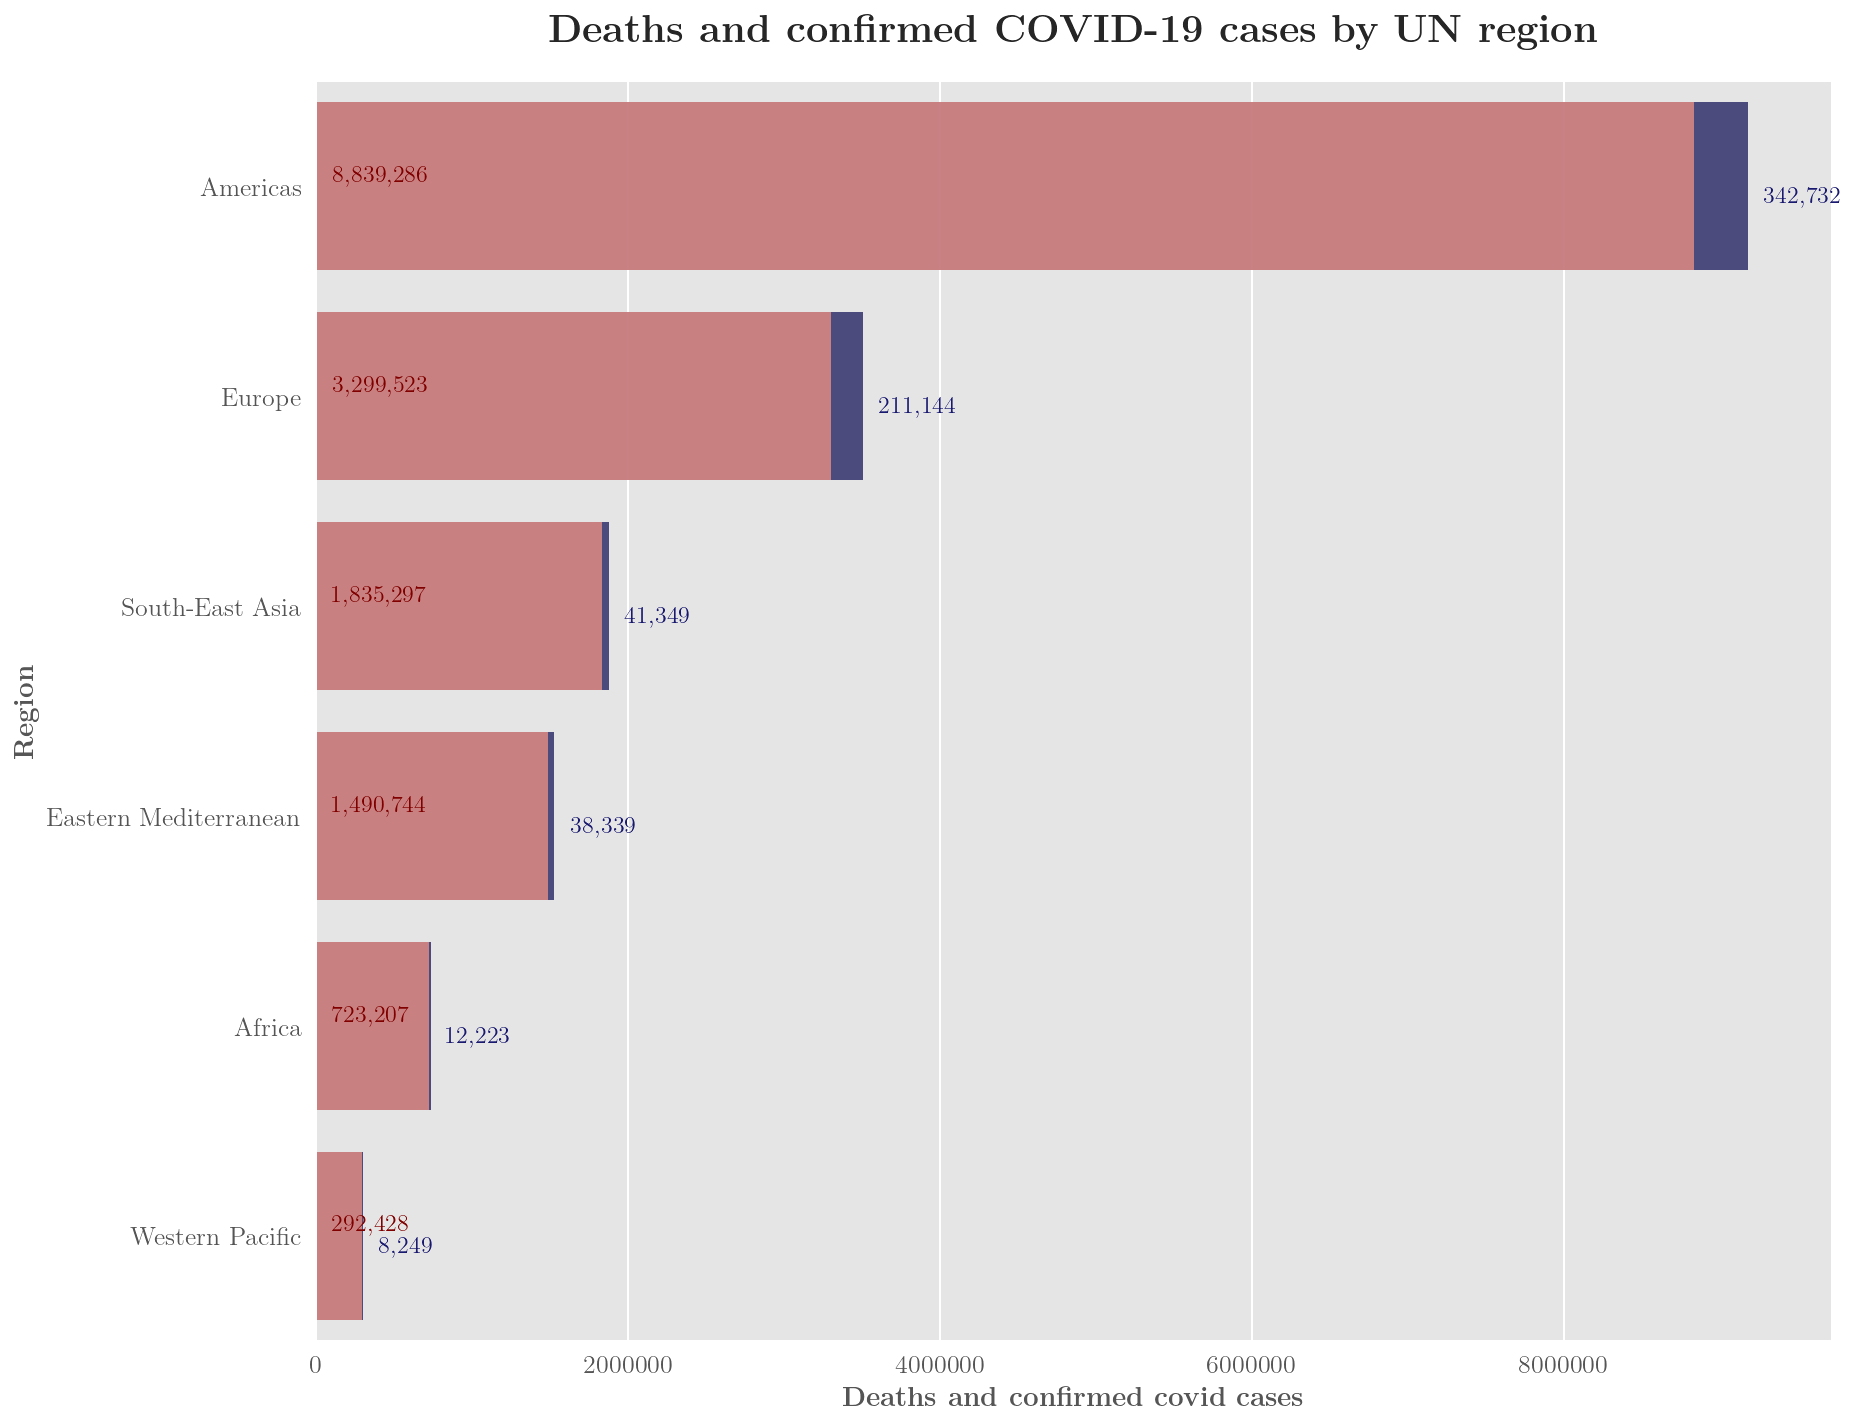

In [19]:
%matplotlib inline

import locale
locale.setlocale(locale.LC_ALL, '')          # for comma-separated values formatting.


# For latex-quality, i.e., publication quality legends and labels on graphs.
# Warning: you must have installed LaTeX on your system.
from matplotlib import rc
rc ('font', family='serif')
rc ('text', usetex=True) # Enable it selectively 
rc ('font', size=16)




plt.style.use ('ggplot')                      # emulate ggplot style
plt.rcParams['legend.fontsize' ] = 16         # legend font size
plt.rcParams[ 'axes.labelsize' ] = 16         # axis label font size
plt.rcParams['figure.dpi'] = 144   
plt.rcParams[ 'figure.figsize' ] = '13,10'

# Now, plot the barchart
sns.barplot(y='Region', x='Total', color='midnightblue',  data=data, alpha=0.8)
sns.barplot(y='Region', x='Confirmed', color='salmon',  data=data, alpha=0.8)



plt.xlim(0, 1.1*max(data.Confirmed))          # expand the x-limit a little bit,
                                              # so that it looks a bit more pleasing


plt.xticks(fontsize=13)                       # font size of the ticks
plt.yticks(fontsize=13)
plt.ticklabel_format(axis='x', style='plain') # use plain number format (not scientific)

plt.xlabel(r'\textbf{Deaths and confirmed covid cases}', 
           size=14)                           # note the use of explicit LaTeX formatting language
plt.ylabel(r'\textbf{Region}', size=14)       # also note the explicit specification of font size

#plt.legend().remove()                         # remove the redundant legend

plt.title(r'\textbf{Deaths and confirmed COVID-19 cases by UN region}', size=20, pad=20)

# Finally, add the values adjacent to the bar

for index, deaths, total in zip(range(len(data)),data.Deaths, data.Total):

    plt.text(total+100000,                   # add a little bit of padding offset
             index,                          # the index location of the bar
             f'{deaths:n}',                   # the value to put
             color='midnightblue',           # color of the value 
             va='top',                       # vertically align to the bar
             size=12)                        # a good font size for the values
 
for index, value in enumerate(data.Confirmed):

    plt.text(100000,                   # add a little bit of padding offset
             index,                          # the index location of the bar
             f'{value:n}',                   # the value to put
             color='maroon',                 # color of the value 
             va='bottom',                    # vertically align to the bar
             size=12)                        # a good font size for the values

       
plt.tight_layout()

## Proportional bar chart

Once again, there is no direct support for proportional bar chart in `seaborn`: one has to instead hack it by overlaying multiple bars on top of each other. For that, one can to create exact fields in the data.

In [20]:
data['Death-prop'] =100*( data.Deaths/data.Confirmed)
data['Active-prop'] =100*( data.Active/data.Confirmed)
data['Recovered-prop'] =100*( data.Recovered/data.Confirmed)
data['Max'] = 100
data['Uptil-Active'] = (data['Death-prop'] + data['Active-prop'])


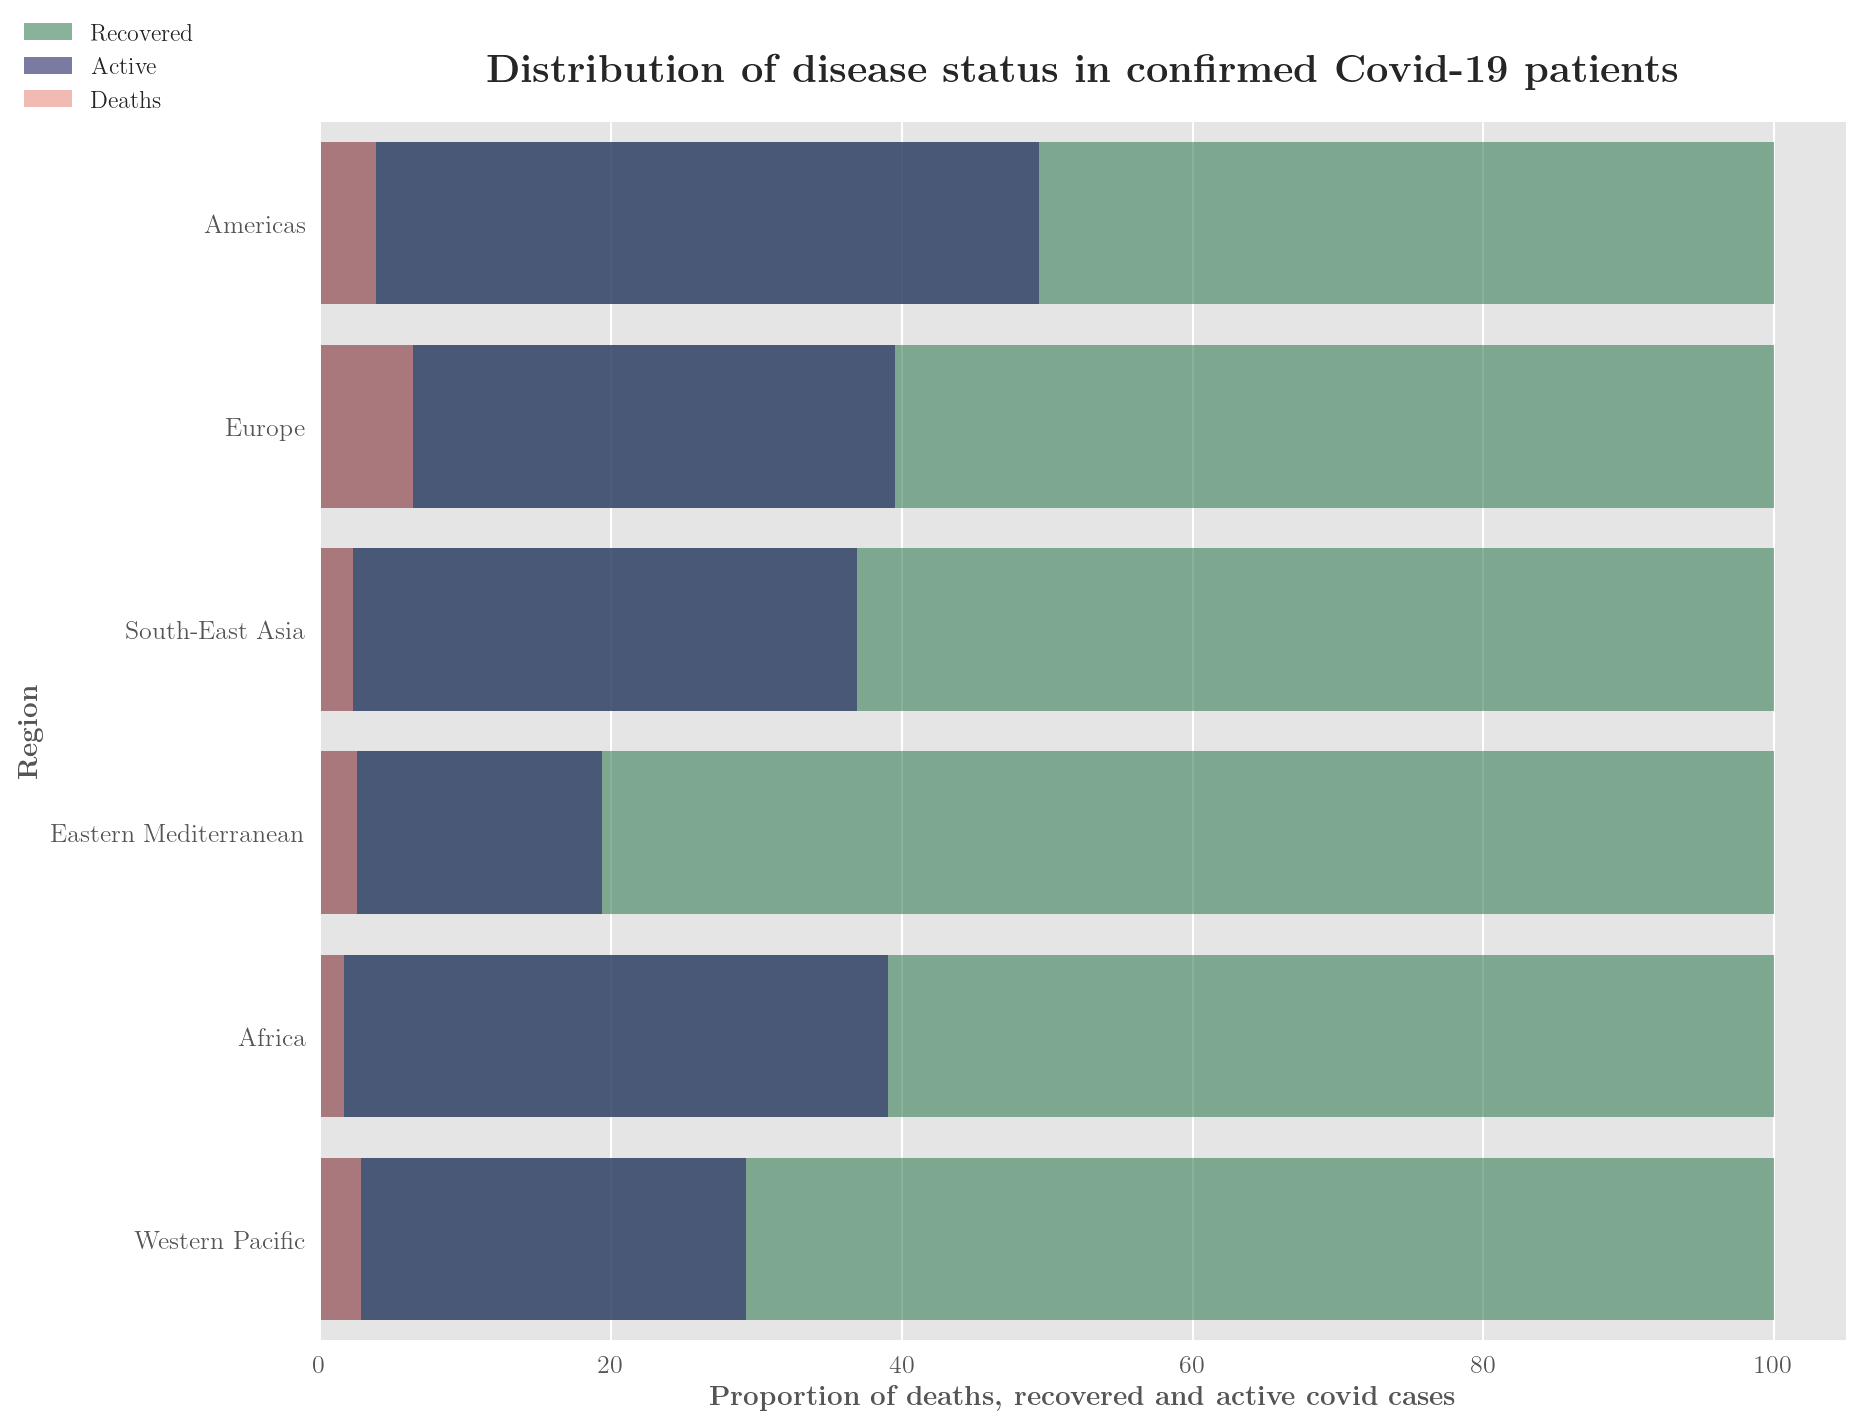

In [21]:

import locale
locale.setlocale(locale.LC_ALL, '')          # for comma-separated values formatting.


# For latex-quality, i.e., publication quality legends and labels on graphs.
# Warning: you must have installed LaTeX on your system.
from matplotlib import rc
rc ('font', family='serif')
rc ('text', usetex=True) # Enable it selectively 
rc ('font', size=16)




plt.style.use ('ggplot')                      # emulate ggplot style
plt.rcParams['legend.fontsize' ] = 16         # legend font size
plt.rcParams[ 'axes.labelsize' ] = 16         # axis label font size
plt.rcParams['figure.dpi'] = 144   
plt.rcParams[ 'figure.figsize' ] = '13,10'

# Now, plot the barchart
sns.barplot(y='Region', x='Max', color='seagreen',  label='Recovered', data=data, alpha=0.6)
sns.barplot(y='Region', x='Uptil-Active', color='midnightblue', label='Active', data=data, alpha=0.6)
sns.barplot(y='Region', x='Death-prop', color='salmon',  label ='Deaths', data=data, alpha=0.6)



plt.xticks(fontsize=13)                       # font size of the ticks
plt.yticks(fontsize=13)
plt.ticklabel_format(axis='x', style='plain') # use plain number format (not scientific)

plt.xlabel(r'\textbf{Proportion of deaths, recovered and active covid cases}', 
           size=14)                           # note the use of explicit LaTeX formatting language
plt.ylabel(r'\textbf{Region}', size=14)       # also note the explicit specification of font size

plt.title(r'\textbf{Distribution of disease status in confirmed Covid-19 patients}', size=20, pad=20)

plt.legend(fontsize=12, loc=[-0.2, 1.0], )
       
plt.tight_layout()

## Polar chart

By now, working with `seaborn`, it is rather difficult to make progress towards a polar chart.
* 